# Tackling Child and Infant Mortality in Africa

## General Overview

Child and infant mortality rates remain a critical issue in Africa, impeding progress toward several Sustainable Development Goals (SDGs), including Goal 3: Good Health and Well-being. This case study aimed at leveraging data-driven approachees to identify actionable insights, develop innovative solutions, and contribute to global efforts that reduces preventable deaths in children under five years of age.

## Objective

The primary objective is to utilize the provided datasets to uncover patterns, correlations, and key drivers of child and infant mortality in African countries. These insights aim to provide strategies and interventions that policymakers, healthcare providers, and organizations can adopt to improve health outcomes for children. 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Datasets

In [8]:
#Importing datasets

# 1. Youth Mortality Rate (YMR)
under15_df = pd.read_csv("/Users/Oriscsson/Desktop/2024 Hackathon/Infant Mortality Dataset/1. youth-mortality-rate.csv")

# 2. Number of infant deaths (IMR)
infant_df = pd.read_csv ("/Users/Oriscsson/Desktop/2024 Hackathon/Infant Mortality Dataset/2. number-of-infant-deaths-unwpp.csv")

# 3. Child mortality rate, for children under 5 years (U5MR)
child_df = pd.read_csv ("/Users/Oriscsson/Desktop/2024 Hackathon/Infant Mortality Dataset/3. child-mortality-by-income-level-of-country.csv")

# 4. Causes of deaths among children less than 5 years 
causes = pd.read_csv ("/Users/Oriscsson/Desktop/2024 Hackathon/Infant Mortality Dataset/4. Causes of Death among Children Aged less than 5 years.csv")

# 5. Number of maternal deaths
maternal_df = pd.read_csv ("/Users/Oriscsson/Desktop/2024 Hackathon/Infant Mortality Dataset/5. number-of-maternal-deaths-by-region.csv")

# 6. births attended by skilled health staff
staff_df = pd.read_csv ("/Users/Oriscsson/Desktop/2024 Hackathon/Infant Mortality Dataset/6. births-attended-by-health-staff-sdgs.csv")

# 7. Global vaccination coverage 
vaccination = pd.read_csv ("/Users/Oriscsson/Desktop/2024 Hackathon/Infant Mortality Dataset/7. global-vaccination-coverage.csv")

# 8. Health protection /insurance coverage
insurance = pd.read_csv ("/Users/Oriscsson/Desktop/2024 Hackathon/Infant Mortality Dataset/8. health-protection-coverage.csv")

## Data cleaning and transformation

### 1. Youth Mortality rate

In [12]:
under15_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10515 entries, 0 to 10514
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Entity                        10515 non-null  object 
 1   Code                          9492 non-null   object 
 2   Year                          10515 non-null  int64  
 3   Under-fifteen mortality rate  10515 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 328.7+ KB


In [13]:
# Filtering out the data containing under 15 year mortality by income
under15_MR_income = under15_df[under15_df['Entity'].str.contains("income countries", case=False, na=False)]
under15_MR_income.head()

,Entity,Code,Year,Under-fifteen mortality rate
3907,High-income countries,NaN,1990,1.553661
3908,High-income countries,NaN,1991,1.482136
3909,High-income countries,NaN,1992,1.416361
3910,High-income countries,NaN,1993,1.354993
3911,High-income countries,NaN,1994,1.294977


In [14]:
# Checking the unique values in the column
under15_MR_income.Entity.unique()

array(['High-income countries', 'Low-income countries',
       'Lower-middle-income countries', 'Upper-middle-income countries'],
      dtype=object)

In [15]:
# Creating a copy of the dataset, which will be transformed and subsequently analyzed
under15_MR = under15_df.copy()

under15_MR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10515 entries, 0 to 10514
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Entity                        10515 non-null  object 
 1   Code                          9492 non-null   object 
 2   Year                          10515 non-null  int64  
 3   Under-fifteen mortality rate  10515 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 328.7+ KB


In [16]:
# Removing null values from this column
under15_MR.dropna(subset = ["Code"], inplace = True)

# rename columns
under15_MR.columns=['country', 'code', 'year','mortality_rate']

under15_MR.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9492 entries, 0 to 10514
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         9492 non-null   object 
 1   code            9492 non-null   object 
 2   year            9492 non-null   int64  
 3   mortality_rate  9492 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 370.8+ KB


### 2.Infact mortality

In [19]:
infant_df.head(5)

,Entity,Code,Year,Deaths - Sex: all - Age: 0 - Variant: estimates
0,Afghanistan,AFG,1950,109220.0
1,Afghanistan,AFG,1951,107971.0
2,Afghanistan,AFG,1952,108140.0
3,Afghanistan,AFG,1953,108248.0
4,Afghanistan,AFG,1954,108241.0


In [20]:
# Filtering out the data containing infant mortality by income
IMR_income = infant_df[infant_df['Entity'].str.contains("income countries", case=False, na=False)]
IMR_income.head()

,Entity,Code,Year,Deaths - Sex: all - Age: 0 - Variant: estimates
7104,High-income countries,NaN,1950,1014009.0
7105,High-income countries,NaN,1951,961443.0
7106,High-income countries,NaN,1952,911523.0
7107,High-income countries,NaN,1953,859825.0
7108,High-income countries,NaN,1954,816560.0


In [21]:
# Creating a copy of the dataset, which will be transformed and subsequently analyzed
infant_MR = infant_df.copy()

# columns with data type, and null/non-null values in each column
infant_MR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 4 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Entity                                           18944 non-null  object 
 1   Code                                             17612 non-null  object 
 2   Year                                             18944 non-null  int64  
 3   Deaths - Sex: all - Age: 0 - Variant: estimates  18944 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 592.1+ KB


In [23]:
# rename columns
infant_MR.columns=['country', 'code', 'year','deaths']

# removing null values from Code column
infant_MR = infant_MR.dropna(subset = ['code'])

infant_MR.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17612 entries, 0 to 18943
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  17612 non-null  object 
 1   code     17612 non-null  object 
 2   year     17612 non-null  int64  
 3   deaths   17612 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 688.0+ KB


In [25]:
infant_MR.head()

,country,code,year,deaths
0,Afghanistan,AFG,1950,109220.0
1,Afghanistan,AFG,1951,107971.0
2,Afghanistan,AFG,1952,108140.0
3,Afghanistan,AFG,1953,108248.0
4,Afghanistan,AFG,1954,108241.0


### 3. Mortality rates of children under 5 years

In [31]:
child_df.head()

,Entity,Code,Year,Observation value - Indicator: Under-five mortality rate - Sex: Total - Wealth quintile: Total - Unit of measure: Deaths per 100 live births
0,Afghanistan,AFG,1957,37.245758
1,Afghanistan,AFG,1958,36.626625
2,Afghanistan,AFG,1959,36.043480
3,Afghanistan,AFG,1960,35.459850
4,Afghanistan,AFG,1961,34.894880


In [34]:
# Filtering out the data containing child (under 5 years old) mortality by income
child_MR_income = child_df[child_df['Entity'].str.contains("income countries", case=False, na=False)]
child_MR_income.head()

,Entity,Code,Year,Observation value - Indicator: Under-five mortality rate - Sex: Total - Wealth quintile: Total - Unit of measure: Deaths per 100 live births
5415,High-income countries,NaN,1990,1.293457
5416,High-income countries,NaN,1991,1.229813
5417,High-income countries,NaN,1992,1.171333
5418,High-income countries,NaN,1993,1.116751
5419,High-income countries,NaN,1994,1.063058


In [35]:
# rename columns
child_MR_income.columns=['Entity', 'Code', 'Year','Mortality_rate_per_100']

In [37]:
# Therefore creating a new column showing the standard mortality rate,  U5MR (per 1,000)= U5MR (per 100)×10
child_MR_income = child_MR_income.assign(
    Mortality_rate_per_1000=child_MR_income['Mortality_rate_per_100'] * 10
)

In [38]:
# Creating a copy of the dataset, which will be transformed and subsequently analyzed
child_MR = child_df.copy()

# columns with data type, and null/non-null values in each column
child_MR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14200 entries, 0 to 14199
Data columns (total 4 columns):
 #   Column                                                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                                                        --------------  -----  
 0   Entity                                                                                                                                        14200 non-null  object 
 1   Code                                                                                                                                          12842 non-null  object 
 2   Year                                                                                                                                          14200 non-null  int64  
 3   Observation value - Indicator: U

In [39]:
# rename columns
child_MR.columns=['country', 'code', 'year','deaths']

# removing null values from Code column
child_MR = child_MR.dropna(subset = ['code'])

child_MR.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12842 entries, 0 to 14199
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  12842 non-null  object 
 1   code     12842 non-null  object 
 2   year     12842 non-null  int64  
 3   deaths   12842 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 501.6+ KB


In [42]:
# To ensure the mortality rates meet standard used by SDG, the death per 100 live births given were converted to per 1000

# Therefore creating a new column showing the standard mortality rate,  U5MR (per 1,000)= U5MR (per 100)×10
child_MR.loc[:, 'mortality_rate'] = child_MR.deaths * 10

In [44]:
# Dropping the column that will not be required for further analysis
child_MR.drop ('deaths', axis = 1, inplace = True)

In [46]:
child_MR.head()

,country,code,year,mortality_rate
0,Afghanistan,AFG,1957,372.45758
1,Afghanistan,AFG,1958,366.26625
2,Afghanistan,AFG,1959,360.43480
3,Afghanistan,AFG,1960,354.59850
4,Afghanistan,AFG,1961,348.94880


### 4. Causes of deaths in children

In [50]:
causes.head()

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,MORT_300,Distribution of causes of death among children...,numeric,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2017,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,EN,2018-11-26T23:00:00.000Z
1,MORT_300,Distribution of causes of death among children...,numeric,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2017,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,EN,2018-11-26T23:00:00.000Z
2,MORT_300,Distribution of causes of death among children...,numeric,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2017,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,EN,2018-11-26T23:00:00.000Z
3,MORT_300,Distribution of causes of death among children...,numeric,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2017,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,EN,2018-11-26T23:00:00.000Z
4,MORT_300,Distribution of causes of death among children...,numeric,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2017,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,EN,2018-11-26T23:00:00.000Z


In [60]:
causes.columns

Index(['IndicatorCode', 'Indicator', 'ValueType', 'ParentLocationCode',
       'ParentLocation', 'Location type', 'SpatialDimValueCode', 'Location',
       'Period type', 'Period', 'IsLatestYear', 'Dim1 type', 'Dim1',
       'Dim1ValueCode', 'Dim2 type', 'Dim2', 'Dim2ValueCode', 'Dim3 type',
       'Dim3', 'Dim3ValueCode', 'DataSourceDimValueCode', 'DataSource',
       'FactValueNumericPrefix', 'FactValueNumeric', 'FactValueUoM',
       'FactValueNumericLowPrefix', 'FactValueNumericLow',
       'FactValueNumericHighPrefix', 'FactValueNumericHigh', 'Value',
       'FactValueTranslationID', 'FactComments', 'Language', 'DateModified'],
      dtype='object')

In [62]:
# Dropping columns that with all rows blank, or all values the same and this not necessary.
causes = causes.drop(['IndicatorCode', 'Indicator', 'ValueType', 'Location type', 'Period type', 'Dim1 type', 'Dim2 type', 'Dim3 type',
           'Dim3', 'Dim3ValueCode', 'DataSourceDimValueCode', 'DataSource', 'FactValueNumericPrefix', 'FactValueUoM',
           'FactValueNumericLowPrefix', 'FactValueNumericLow', 'FactValueNumericHighPrefix', 'FactValueNumericHigh',
            'FactValueTranslationID', 'FactComments', 'Language', 'DateModified', 'IsLatestYear', 'Dim1ValueCode',
                  'Dim2ValueCode' ], axis =1 )

In [64]:
causes.head()

,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Period,Dim1,Dim2,FactValueNumeric,Value
0,EMR,Eastern Mediterranean,AFG,Afghanistan,2017,0-27 days,Other noncommunicable diseases,0.0006,0.0
1,EMR,Eastern Mediterranean,AFG,Afghanistan,2017,0-27 days,Injuries,0.0110,0.0
2,EMR,Eastern Mediterranean,AFG,Afghanistan,2017,0-27 days,HIV/AIDS,0.0000,0.0
3,EMR,Eastern Mediterranean,AFG,Afghanistan,2017,0-27 days,Diarrhoeal diseases,0.0110,0.0
4,EMR,Eastern Mediterranean,AFG,Afghanistan,2017,0-27 days,Tetanus,0.0270,0.0


In [65]:
# rename columns
causes.columns=['region_code', 'region', 'code','country', 'year', 'age_group', 'cause_of_death', 'value_numeric', 'value']

causes.head()

,region_code,region,code,country,year,age_group,cause_of_death,value_numeric,value
0,EMR,Eastern Mediterranean,AFG,Afghanistan,2017,0-27 days,Other noncommunicable diseases,0.0006,0.0
1,EMR,Eastern Mediterranean,AFG,Afghanistan,2017,0-27 days,Injuries,0.0110,0.0
2,EMR,Eastern Mediterranean,AFG,Afghanistan,2017,0-27 days,HIV/AIDS,0.0000,0.0
3,EMR,Eastern Mediterranean,AFG,Afghanistan,2017,0-27 days,Diarrhoeal diseases,0.0110,0.0
4,EMR,Eastern Mediterranean,AFG,Afghanistan,2017,0-27 days,Tetanus,0.0270,0.0


In [67]:
causes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146664 entries, 0 to 146663
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   region_code     146664 non-null  object 
 1   region          146664 non-null  object 
 2   code            146664 non-null  object 
 3   country         146664 non-null  object 
 4   year            146664 non-null  int64  
 5   age_group       146664 non-null  object 
 6   cause_of_death  146664 non-null  object 
 7   value_numeric   146664 non-null  float64
 8   value           146664 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 10.1+ MB


### 5. Maternal deaths

In [72]:
maternal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7056 entries, 0 to 7055
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Entity                     7056 non-null   object 
 1   Code                       6696 non-null   object 
 2   Year                       7056 non-null   int64  
 3   Estimated maternal deaths  7056 non-null   float64
 4   959828-annotations         36 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 275.8+ KB


In [74]:
# Filtering out the data containing maternal mortality by income
maternal_MR_income = maternal_df[maternal_df['Entity'].str.contains("income countries", case=False, na=False)]
maternal_MR_income.head()

,Entity,Code,Year,Estimated maternal deaths,959828-annotations
2700,High-income countries,NaN,1985,3109.0522,NaN
2701,High-income countries,NaN,1986,3053.1228,NaN
2702,High-income countries,NaN,1987,2974.8386,NaN
2703,High-income countries,NaN,1988,2842.7144,NaN
2704,High-income countries,NaN,1989,2686.6501,NaN


In [76]:
# Creating a copy of the dataset, which will be transformed and subsequently analyzed
maternal_MR = maternal_df.copy()

# columns with data type, and null/non-null values in each column
maternal_MR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7056 entries, 0 to 7055
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Entity                     7056 non-null   object 
 1   Code                       6696 non-null   object 
 2   Year                       7056 non-null   int64  
 3   Estimated maternal deaths  7056 non-null   float64
 4   959828-annotations         36 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 275.8+ KB


In [78]:
maternal_MR.head()

,Entity,Code,Year,Estimated maternal deaths,959828-annotations
0,Afghanistan,AFG,1985,10258.5340,NaN
1,Afghanistan,AFG,1986,8671.9210,NaN
2,Afghanistan,AFG,1987,8488.9600,NaN
3,Afghanistan,AFG,1988,7522.1216,NaN
4,Afghanistan,AFG,1989,7549.7050,NaN


In [80]:
# rename columns
maternal_MR.columns=['country', 'code', 'year','deaths', 'annotations']

# removing null values from Code column
maternal_MR = maternal_MR.dropna(subset = ['code'])

#Dropping annotations column
maternal_MR.drop('annotations', axis=1, inplace = True)

maternal_MR.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6696 entries, 0 to 7055
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  6696 non-null   object 
 1   code     6696 non-null   object 
 2   year     6696 non-null   int64  
 3   deaths   6696 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 261.6+ KB


### 6. Skilled health staff

In [84]:
staff_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985 entries, 0 to 2984
Data columns (total 4 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Entity                                                2985 non-null   object 
 1   Code                                                  2943 non-null   object 
 2   Year                                                  2985 non-null   int64  
 3   Births attended by skilled health staff (% of total)  2985 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 93.4+ KB


In [86]:
# Filtering out the data containing maternal mortality by income
staff_income = staff_df[staff_df['Entity'].str.contains("income countries", case=False, na=False)]
staff_income.head()

,Entity,Code,Year,Births attended by skilled health staff (% of total)
1292,High-income countries,NaN,2000,98.920630
1293,High-income countries,NaN,2010,98.970890
1294,High-income countries,NaN,2019,98.718730
1694,Low-income countries,NaN,2000,31.276554
1695,Low-income countries,NaN,2010,46.595997


In [88]:
# Creating a copy of the dataset, which will be transformed and subsequently analyzed
staff_birth = staff_df.copy()

# columns with data type, and null/non-null values in each column
staff_birth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985 entries, 0 to 2984
Data columns (total 4 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Entity                                                2985 non-null   object 
 1   Code                                                  2943 non-null   object 
 2   Year                                                  2985 non-null   int64  
 3   Births attended by skilled health staff (% of total)  2985 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 93.4+ KB


In [91]:
# rename columns
staff_birth.columns=['country', 'code', 'year','births']

# removing null values from Code column
staff_birth = staff_birth.dropna(subset = ['code'])

staff_birth.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2943 entries, 0 to 2984
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  2943 non-null   object 
 1   code     2943 non-null   object 
 2   year     2943 non-null   int64  
 3   births   2943 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 115.0+ KB


### 7. global vaccination coverage

In [95]:
# Creating a copy of the dataset, which will be transformed and subsequently analyzed
vaccination_df = vaccination.copy()

vaccination_df.head()

,Entity,Code,Year,BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),Hib3 (% of one-year-olds immunized),IPV1 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),PCV3 (% of one-year-olds immunized),Pol3 (% of one-year-olds immunized),RCV1 (% of one-year-olds immunized),RotaC (% of one-year-olds immunized),YFV (% of one-year-olds immunized),DTP3 (% of one-year-olds immunized)
0,Afghanistan,AFG,1982,10.0,NaN,NaN,NaN,8.0,NaN,5.0,NaN,NaN,NaN,5.0
1,Afghanistan,AFG,1983,10.0,NaN,NaN,NaN,9.0,NaN,5.0,NaN,NaN,NaN,5.0
2,Afghanistan,AFG,1984,11.0,NaN,NaN,NaN,14.0,NaN,16.0,NaN,NaN,NaN,16.0
3,Afghanistan,AFG,1985,17.0,NaN,NaN,NaN,14.0,NaN,15.0,NaN,NaN,NaN,15.0
4,Afghanistan,AFG,1986,18.0,NaN,NaN,NaN,14.0,NaN,11.0,NaN,NaN,NaN,11.0


In [97]:
# removing null values from Code column
vaccination_df = vaccination_df.dropna(subset = ['Code'])

vaccination_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7645 entries, 0 to 7896
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Entity                                7645 non-null   object 
 1   Code                                  7645 non-null   object 
 2   Year                                  7645 non-null   int64  
 3   BCG (% of one-year-olds immunized)    6245 non-null   float64
 4   HepB3 (% of one-year-olds immunized)  4214 non-null   float64
 5   Hib3 (% of one-year-olds immunized)   3437 non-null   float64
 6   IPV1 (% of one-year-olds immunized)   1255 non-null   float64
 7   MCV1 (% of one-year-olds immunized)   7476 non-null   float64
 8   PCV3 (% of one-year-olds immunized)   1413 non-null   float64
 9   Pol3 (% of one-year-olds immunized)   7603 non-null   float64
 10  RCV1 (% of one-year-olds immunized)   3946 non-null   float64
 11  RotaC (% of one-year-o

In [99]:
# Changing column names to improve efficiency
vaccination_df.columns = vaccination_df.columns.str.replace(" (% of one-year-olds immunized)", "")

vaccination_df.columns

Index(['Entity', 'Code', 'Year', 'BCG', 'HepB3', 'Hib3', 'IPV1', 'MCV1',
       'PCV3', 'Pol3', 'RCV1', 'RotaC', 'YFV', 'DTP3'],
      dtype='object')

In [101]:
# Renaming selected columns
vaccination_df.rename(columns= {'Entity':'country', 'Year':'year', 'Code':'code' }, inplace = True)

vaccination_df.head()

,country,code,year,BCG,HepB3,Hib3,IPV1,MCV1,PCV3,Pol3,RCV1,RotaC,YFV,DTP3
0,Afghanistan,AFG,1982,10.0,NaN,NaN,NaN,8.0,NaN,5.0,NaN,NaN,NaN,5.0
1,Afghanistan,AFG,1983,10.0,NaN,NaN,NaN,9.0,NaN,5.0,NaN,NaN,NaN,5.0
2,Afghanistan,AFG,1984,11.0,NaN,NaN,NaN,14.0,NaN,16.0,NaN,NaN,NaN,16.0
3,Afghanistan,AFG,1985,17.0,NaN,NaN,NaN,14.0,NaN,15.0,NaN,NaN,NaN,15.0
4,Afghanistan,AFG,1986,18.0,NaN,NaN,NaN,14.0,NaN,11.0,NaN,NaN,NaN,11.0


### 8. Health insurance coverage 

In [105]:
insurance.head()

,Entity,Code,Year,Share of population covered by health insurance (ILO (2014))
0,Albania,ALB,2008,23.6
1,Algeria,DZA,2005,85.2
2,American Samoa,ASM,2009,3.0
3,Angola,AGO,2010,0.0
4,Antigua and Barbuda,ATG,2007,51.1


In [107]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 4 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Entity                                                        162 non-null    object 
 1   Code                                                          162 non-null    object 
 2   Year                                                          162 non-null    int64  
 3   Share of population covered by health insurance (ILO (2014))  162 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.2+ KB


In [109]:
# rename columns
insurance.columns=['country', 'code', 'year','insurance_cover']

insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          162 non-null    object 
 1   code             162 non-null    object 
 2   year             162 non-null    int64  
 3   insurance_cover  162 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.2+ KB


## Year range for determining mortality rates

With earliest data starting from 1950 in the infact mortality dataset and 1932 for child mortality rates, it was important to focus on relevant and recent dates that align with SDG. 

To gain a comprehensive understanding of IMR and U5MR in this dataset, ranges with global policy periods (e.g., MDG era, SDG era) were selected.

•	1991–2000: MDG planning phase; increased focus on reducing child mortality.

•	2001–2015: Millennium Development Goals (MDGs) implementation period.

•	2016–2023: Sustainable Development Goals (SDGs) implementation.

Thus, the datasets were filtered to consider **1990 - Till date**

In [114]:
# Filtering data from 1990 till date
under15_MR = under15_MR[under15_MR.year.between(1990,2024)]
infant_MR = infant_MR[infant_MR.year.between(1990,2024)]
child_MR = child_MR[child_MR.year.between(1990,2024)]
causes_df = causes[causes.year.between(1990,2024)]
maternal_MR = maternal_MR[maternal_MR.year.between(1990,2024)]
staff_birth = staff_birth[staff_birth.year.between(1990,2024)]
vaccination_df = vaccination_df[vaccination_df.year.between(1990,2024)]
insurance_df = insurance[insurance.year.between(1990,2024)]

## Adding the region/continent to all the dataset

In [118]:
#Creating a copy of causes, with the aim of selecting regions from this dataset to merge with other tables
region = causes.copy()

# Selecting only required columns from this table
region = region[['region_code', 'region', 'code']]

# dropping duplicates from the country code
region = region.drop_duplicates(subset = 'code')

region.head()

,region_code,region,code
0,EMR,Eastern Mediterranean,AFG
22,EUR,Europe,ALB
47,AFR,Africa,DZA
68,EUR,Europe,AND
103,AFR,Africa,AGO


In [120]:
# Merging the various tables to get the region and region code attached to correspodning countries

# under 15 years mortality table
under_15_MR = under15_MR.merge(region, on = ['code'])

# infant mortality table
infant_MR = infant_MR.merge(region, on= ['code'])

# child mortality table
child_MR = child_MR.merge(region, on= ['code'])

# maternal mortality
maternal_MR = maternal_MR.merge(region, on= ['code'])

# skilled health staff
staff_birth = staff_birth.merge(region, on= ['code'])

# vaccination
vaccination_df = vaccination_df.merge(region, on= ['code'])

# insurance
insurance_df = insurance_df.merge(region, on= ['code'])


In [122]:
#Filtering data and showing only Africa
under_15_AFR = under_15_MR[under_15_MR.region_code == "AFR"]

child_AFR = child_MR[child_MR.region_code == "AFR"]

infant_AFR = infant_MR[infant_MR.region_code == "AFR"]

causes_AFR = causes_df[causes_df.region_code == "AFR"]

maternal_AFR = maternal_MR[maternal_MR.region_code == "AFR"]

staff_AFR = staff_birth[staff_birth.region_code == "AFR"]

vaccination_AFR = vaccination_df[vaccination_df.region_code == "AFR"]

insurance_AFR = insurance_df[insurance_df.region_code == "AFR"]

## Analysis and Visualisation

#### Infant and child (under 5 year and 15 years) mortality rate

In [127]:
# Calculating the mortality rate of children under 15 years in the different regions, filtering to the latest year available in data
(under_15_MR[under_15_MR.year == 2022]).groupby('region')['mortality_rate'].mean()

region
Africa                   6.929973
Americas                 1.887363
Eastern Mediterranean    3.149588
Europe                   0.762483
South-East Asia          2.754059
Western Pacific          2.234888
Name: mortality_rate, dtype: float64

Based on the last year in the dataset, Africa has ca. 40% of the mortality rates of children under 15 years

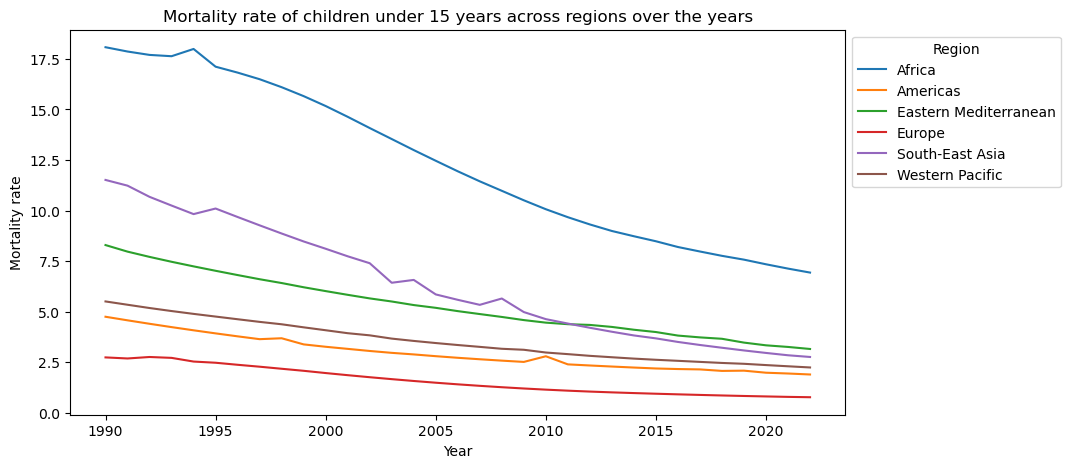

In [130]:
#Under 15 year mortality in each region

# Grouping the regions by year to show mortality rate of children under 15 years in each region over the years
under_15_MR_chart = under_15_MR.groupby(['region', 'year']).mean(numeric_only=True).reset_index()

# Line plot for death of children under 15 years across regions over the years
plt.figure(figsize=(10, 5))
[plt.plot(value['year'], value['mortality_rate'], label=region) for region, value in under_15_MR_chart.groupby('region')]

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Mortality rate')
plt.title('Mortality rate of children under 15 years across regions over the years')
plt.legend(title="Region", bbox_to_anchor=(1.00, 1), loc='upper left')
plt.show()

In [132]:
# Calculating the total death of infants in the different regions, filtering to the latest year available in data
(infant_MR[infant_MR.year == 2022]).groupby('region')['deaths'].sum().sort_values(ascending=False)

region
Africa                   1.917810e+06
South-East Asia          7.737820e+05
Eastern Mediterranean    6.870720e+05
Americas                 1.490130e+05
Western Pacific          1.403030e+05
Europe                   6.402200e+04
Name: deaths, dtype: float64

Based on the last year in the dataset, Africa has 51.4% of the infant (0-27 days) total death recorded in the world.

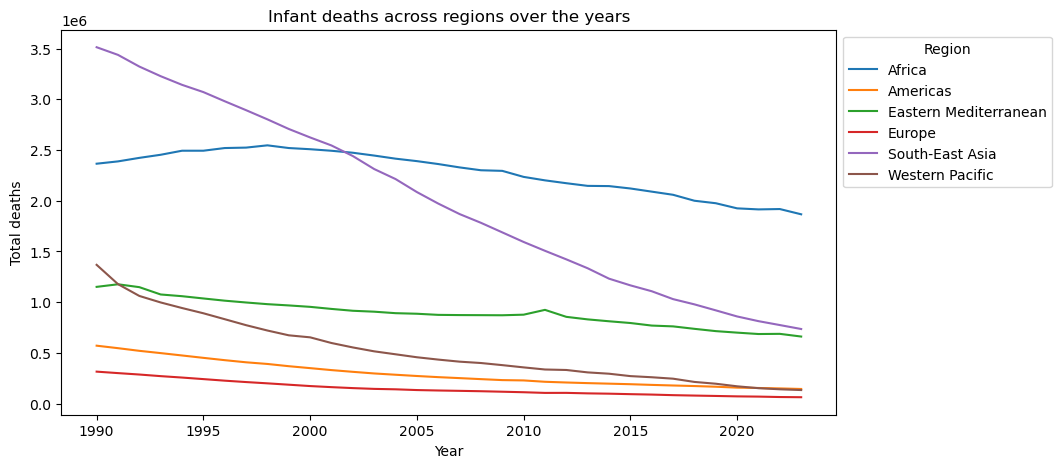

In [135]:
#Infant mortality in each region

# Grouping the regions by year to show total number of deaths of infants in each region over the years
infant_MR_chart = infant_MR.groupby(['region', 'year']).sum(numeric_only=True).reset_index()

# Line plot for infant deaths across regions over the years
plt.figure(figsize=(10, 5))
[plt.plot(value['year'], value['deaths'], label=region) for region, value in infant_MR_chart.groupby('region')]

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Total deaths')
plt.title('Infant deaths across regions over the years')
plt.legend(title="Region", bbox_to_anchor=(1.00, 1), loc='upper left')
plt.show()

In [137]:
# Calculating the mortality rate of children under 5 years in the different regions, filtering to the latest year available in data
(child_MR[child_MR.year == 2022]).groupby('region')['mortality_rate'].mean()

region
Africa                   57.584894
Americas                 16.057346
Eastern Mediterranean    26.560705
Europe                    6.400673
South-East Asia          23.276836
Western Pacific          18.830581
Name: mortality_rate, dtype: float64

Based on the last year in the dataset, Africa has ca. 40% of the mortality rate of children under 5 years

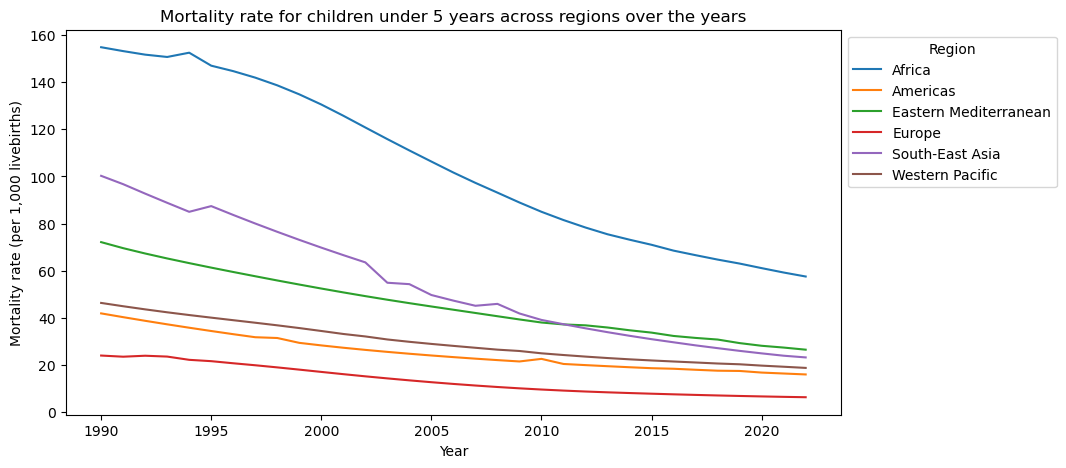

In [140]:
# Mortality rate of children under 5 years in each region

# Grouping the regions by year to show mortality rate for children under 5 years in each region over the years
U5MR = child_MR.groupby(['region', 'year']).mean(numeric_only=True).reset_index()

# Line plot for mortality rate for children under 5 across regions over the years
plt.figure(figsize=(10, 5))
[plt.plot(value['year'], value['mortality_rate'], label=region) for region, value in U5MR.groupby('region')]

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Mortality rate (per 1,000 livebirths)')
plt.title('Mortality rate for children under 5 years across regions over the years')
plt.legend(title="Region", bbox_to_anchor=(1.00, 1), loc='upper left')
plt.show()

Africa has the highest infant mortality recorded amongst the regions since 2005. South-East Asia which had the highest infant deaths recorded from 1990 - 2000, had a drastic drop in these values. Europe has the lowest. Americas and Western Pacific also have low infant deaths, values comparable to Europe.

The chart shows that Africa has constantly had the highest mortality rate of children under 15 years from 1990 till date, accounting for more than half of the recorded cases in 2022, the latest entry year

Since 1990, there has been a steady decrease in the mortality rate of children under 5 years in the various regions. As regards the mortality rates of children under 5 years, similar patterns are observed as in infant mortality, with Africa having the highest rate of children under 5 deaths per 1000. Europe has the lowest mortality rate of children in this group.

It is worthy to place more emphasis on South-East Asia, as they initially had high infant and child mortality, and also maternal deaths, with values comparable to Africa. However, they have turned it around as and should serve as a template to be adopted by countries in Africa.

#### Infant and child (under 5 years) mortality rate in Africa

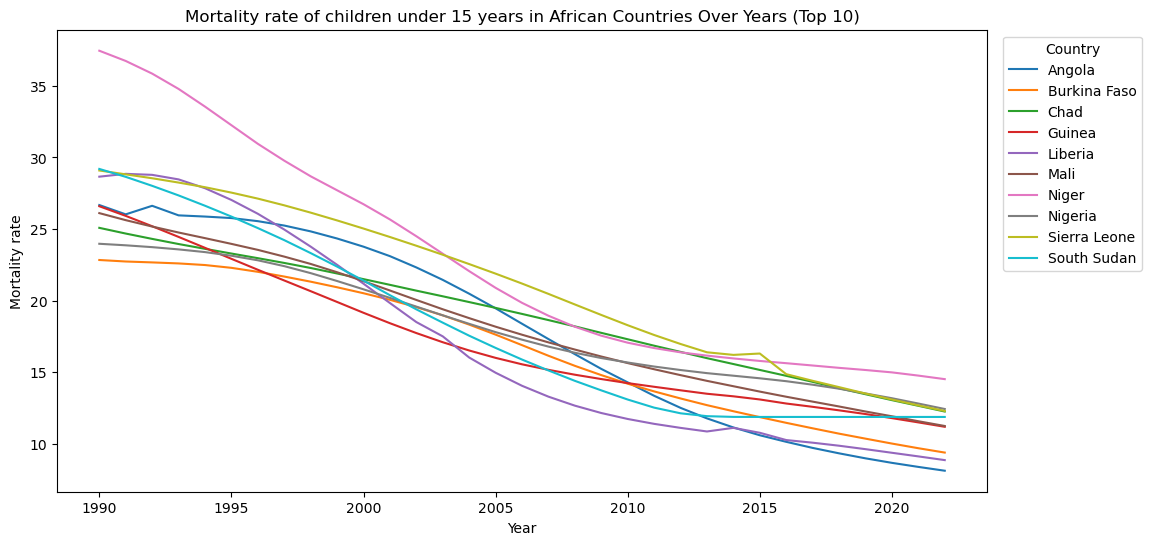

In [145]:
# Top 10 african countries with the highest mortality rate for children under 15 years
top_10_countries_U15 = under_15_AFR.groupby('country')['mortality_rate'].sum().nlargest(10).index

# Filter and reshape data for only the top 10 countries
top_10_data_U15 = (under_15_AFR[under_15_AFR['country'].isin(top_10_countries_U15)]
              .groupby(['country', 'year'])['mortality_rate'].sum().reset_index())

# Plotting mortality rate for children under 15 years for top 10 countries
plt.figure(figsize=(12, 6))
[plt.plot(data['year'], data['mortality_rate'], label=country) for country, data in top_10_data_U15.groupby('country')]
plt.xlabel('Year')
plt.ylabel('Mortality rate')
plt.title('Mortality rate of children under 15 years in African Countries Over Years (Top 10)')
plt.legend(title="Country", bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

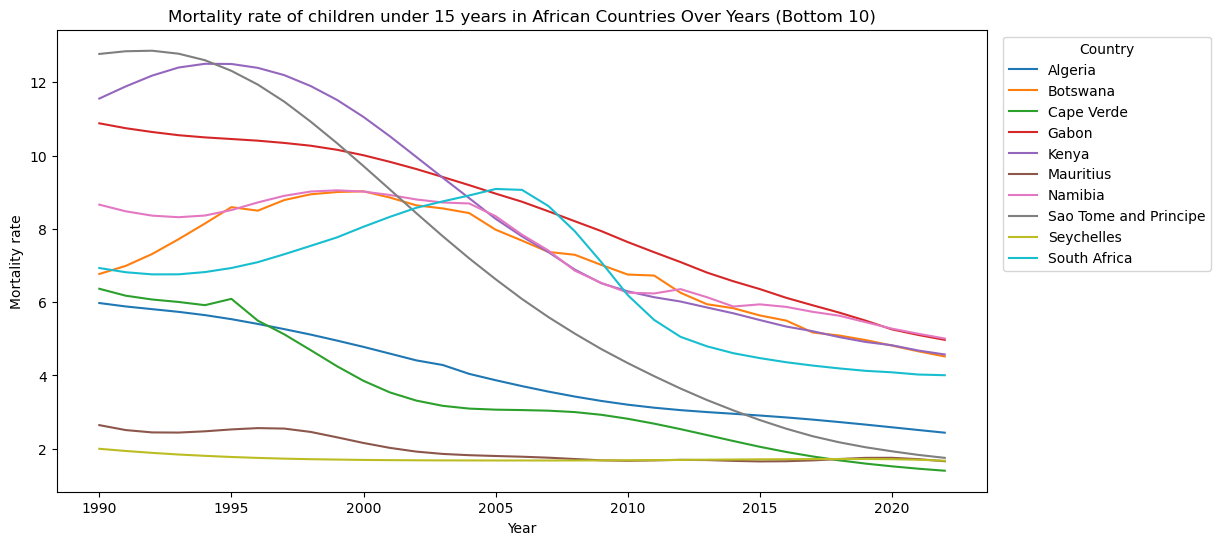

In [147]:
# Bottom 10 african countries with the lowest mortality rate for children under 15 years
bottom_10_countries_U15 = under_15_AFR.groupby('country')['mortality_rate'].sum().nsmallest(10).index

# Filter and reshape data for only the top 10 countries
bottom_10_data_U15 = (under_15_AFR[under_15_AFR['country'].isin(bottom_10_countries_U15)]
              .groupby(['country', 'year'])['mortality_rate'].sum().reset_index())

# Plotting mortality rate for children under 15 years for bottom 10 countries
plt.figure(figsize=(12, 6))
[plt.plot(data['year'], data['mortality_rate'], label=country) for country, data in bottom_10_data_U15.groupby('country')]
plt.xlabel('Year')
plt.ylabel('Mortality rate')
plt.title('Mortality rate of children under 15 years in African Countries Over Years (Bottom 10)')
plt.legend(title="Country", bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

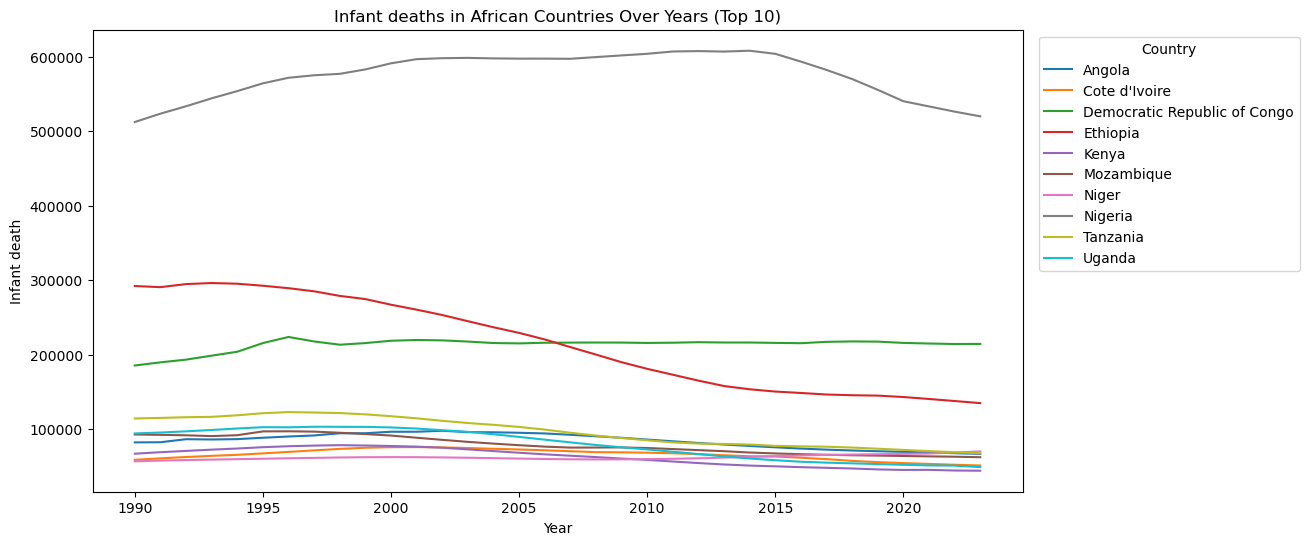

In [150]:
# Top 10 african countries with the highest infant death
top_10_countries = infant_AFR.groupby('country')['deaths'].sum().nlargest(10).index

# Filter and reshape data for only the top 10 countries
top_10_data = (infant_AFR[infant_AFR['country'].isin(top_10_countries)]
              .groupby(['country', 'year'])['deaths'].sum().reset_index())

# Plotting infant death for top 10 countries
plt.figure(figsize=(12, 6))
[plt.plot(data['year'], data['deaths'], label=country) for country, data in top_10_data.groupby('country')]
plt.xlabel('Year')
plt.ylabel('Infant death')
plt.title('Infant deaths in African Countries Over Years (Top 10)')
plt.legend(title="Country", bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

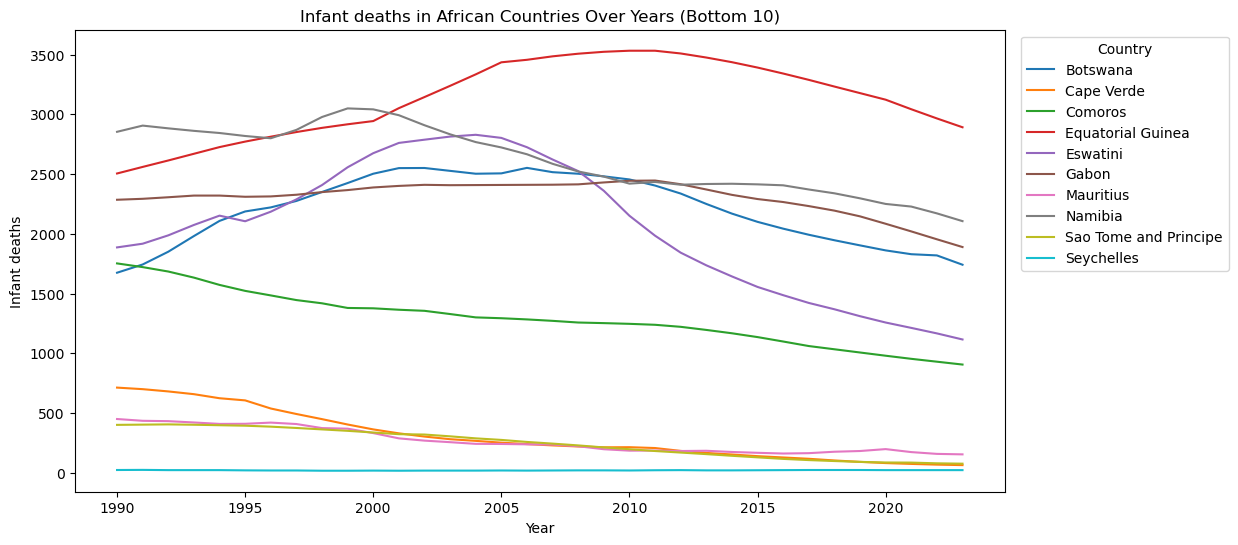

In [152]:
# Bottom 10 african countries with the highest infant death
bottom_10_countries = infant_AFR.groupby('country')['deaths'].mean().nsmallest(10).index

# Filter and reshape data for only the top 10 countries
bottom_10_data = (infant_AFR[infant_AFR['country'].isin(bottom_10_countries)]
              .groupby(['country', 'year'])['deaths'].mean().reset_index())

# Plotting infant death for bottom 10 countries
plt.figure(figsize=(12, 6))
[plt.plot(data['year'], data['deaths'], label=country) for country, data in bottom_10_data.groupby('country')]
plt.xlabel('Year')
plt.ylabel('Infant deaths')
plt.title('Infant deaths in African Countries Over Years (Bottom 10)')
plt.legend(title="Country", bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

#### Child Mortality

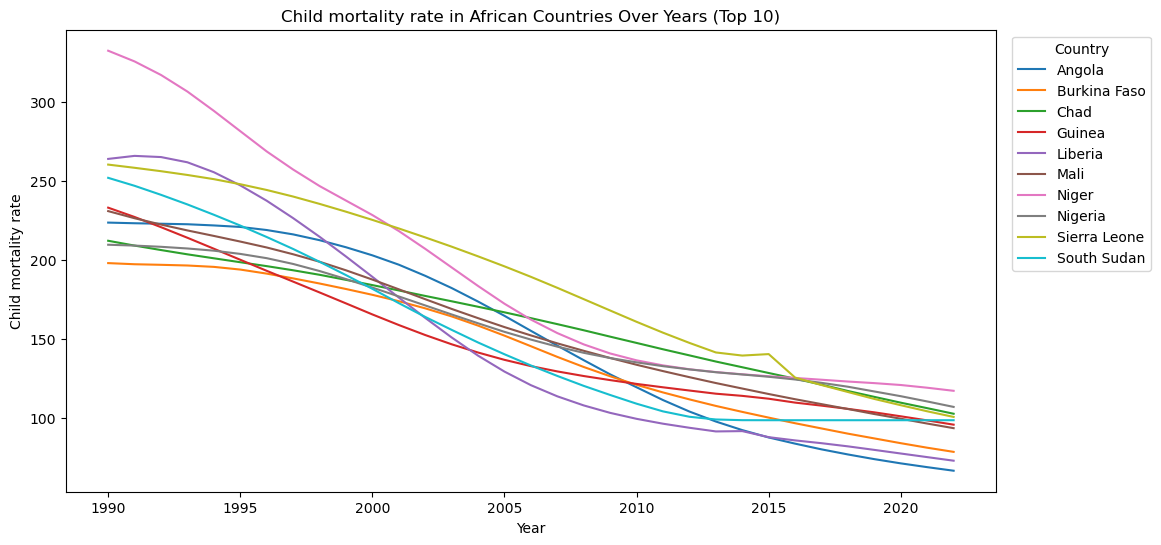

In [156]:
# Top 10 african countries with the highest child death
top_10_countries_child = child_AFR.groupby('country')['mortality_rate'].mean().nlargest(10).index

# Filter and reshape data for only the top 10 countries
top_10_data_child = (child_AFR[child_AFR['country'].isin(top_10_countries_child)]
              .groupby(['country', 'year'])['mortality_rate'].mean().reset_index())

# Plotting infant death for top 10 countries
plt.figure(figsize=(12, 6))
[plt.plot(data['year'], data['mortality_rate'], label=country) for country, data in top_10_data_child.groupby('country')]
plt.xlabel('Year')
plt.ylabel('Child mortality rate')
plt.title('Child mortality rate in African Countries Over Years (Top 10)')
plt.legend(title="Country", bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

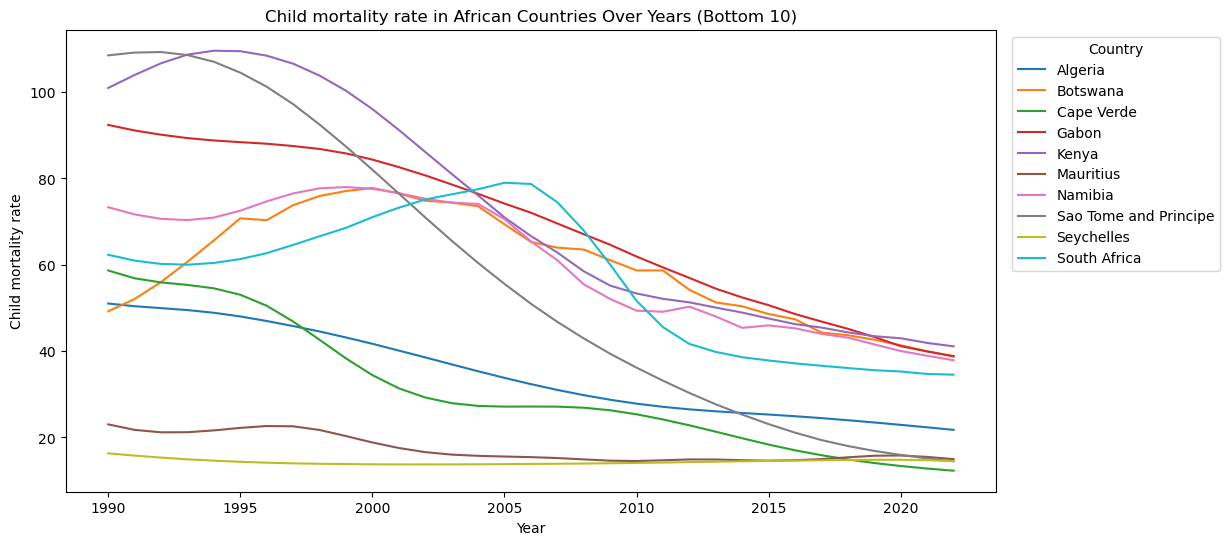

In [158]:
# Bottom 10 african countries with the highest child death
bottom_10_countries_child = child_AFR.groupby('country')['mortality_rate'].mean().nsmallest(10).index

# Filter and reshape data for only the top 10 countries
bottom_10_data_child = (child_AFR[child_AFR['country'].isin(bottom_10_countries_child)]
              .groupby(['country', 'year'])['mortality_rate'].mean().reset_index())

# Plotting infant death for bottom 10 countries
plt.figure(figsize=(12, 6))
[plt.plot(data['year'], data['mortality_rate'], label=country) for country, data in bottom_10_data_child.groupby('country')]
plt.xlabel('Year')
plt.ylabel('Child mortality rate')
plt.title('Child mortality rate in African Countries Over Years (Bottom 10)')
plt.legend(title="Country", bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

**INSIGHTS**

Taking a closer look at Africa, and identifying the trends of countries with the highest and lowest mortality rates provided some useful information.

Nigeria (highest infant deaths, expected due to the country being the most populous African country), Angola, Niger (highest child mortality rate), Democratic Republic of Congo(DRC) and Ethiopia were identified as common countries with the highest infant and child mortality rates in Africa.

On the other hand, countries like Seychelles, Cape Verde, Mauritius, Sao Tome and Principe and Botswana were identified as African countries with the lowest mortality rats of infants and children (under 5 and 15 years).

South-East Asia serves as a regional benchmark for Africa, as they initially had high infant and child mortality. However, they have turned it around.

In Africa, the countries with the lowest mortality rates could also have strategies that can be adopted.

## Factors affecting infant and child mortality 

In [183]:
# Merge infant, child, maternal, and staff data, drop unwanted columns, and rename columns
merged_df = (
    pd.merge(infant_MR, child_MR, on=['code', 'year'], how='outer')
    .drop(columns=['region_code_y', 'region_y', 'country_y'])
    .merge(maternal_MR, on=['code', 'year'], how='outer')
    .drop(columns=['region_code', 'region', 'country'])
    .merge(staff_birth, on=['code', 'year'], how='outer')
    .drop(columns=['region_code', 'region', 'country'])
    .merge(insurance_df, on = ['code', 'year'], how = 'outer')
    .drop(columns=['region_code', 'region', 'country'])
)

In [185]:
# Rename columns
merged_df.columns = ['country', 'code', 'year', 'infant_deaths', 'region_code', 'region', 
                      'under_5_MR', 'maternal_death', 'skilled_health_staff', 'insurance_cover']

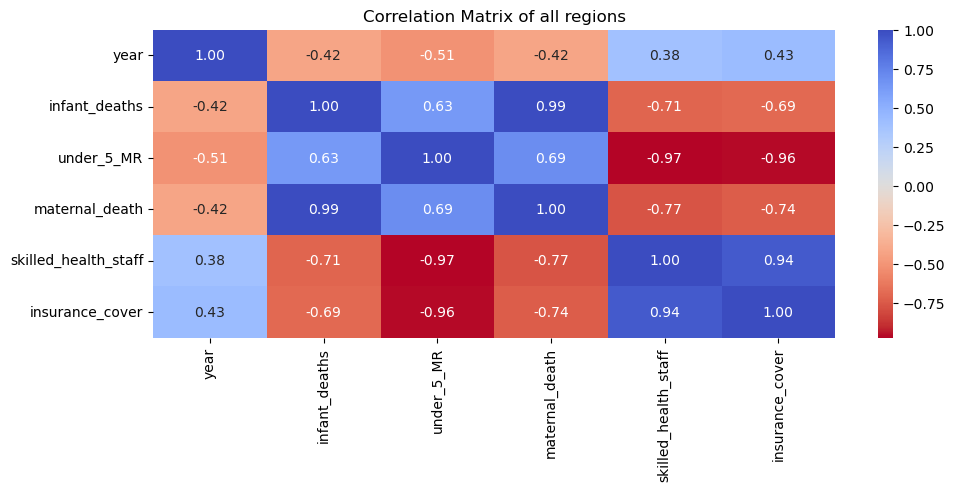

In [187]:
# Calculate the correlation matrix
correlation_matrix = merged_df[["year",'infant_deaths', 'under_5_MR', 'maternal_death', 'skilled_health_staff', 'insurance_cover']].corr()
                                 
#Correlation matrix plot
plt.figure(figsize=(11, 4))
sns.heatmap(correlation_matrix.corr(numeric_only=True), cmap="coolwarm_r", fmt='.2f', annot=True)

#Add title
plt.title('Correlation Matrix of all regions')
plt.show()

In [190]:
# Filterig dataset to observe the correlation of several factors with child and infant mortality in Africa
merged_AFR = merged_df[merged_df.region_code == "AFR"]
merged_AFR.head()

,country,code,year,infant_deaths,region_code,region,under_5_MR,maternal_death,skilled_health_staff,insurance_cover
34,Angola,AGO,1990,82443.0,AFR,Africa,223.58791,6675.1250,NaN,NaN
35,Angola,AGO,1991,82664.0,AFR,Africa,223.17738,6577.1885,NaN,NaN
36,Angola,AGO,1992,86732.0,AFR,Africa,222.87016,7266.2026,NaN,NaN
37,Angola,AGO,1993,86353.0,AFR,Africa,222.54498,7125.9927,NaN,NaN
38,Angola,AGO,1994,86828.0,AFR,Africa,221.79365,7074.3710,NaN,NaN


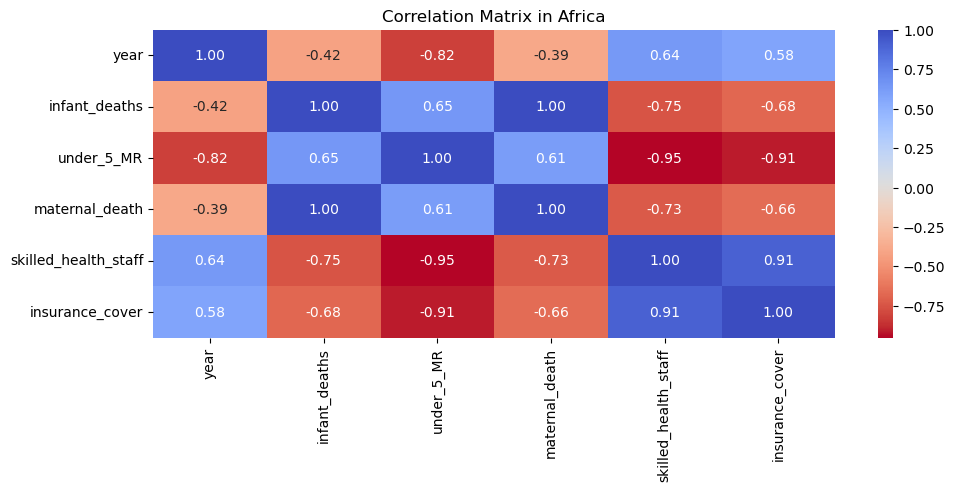

In [192]:
# Calculate the correlation matrix
correlation_matrix_afr = merged_AFR[["year",'infant_deaths', 'under_5_MR', 'maternal_death', 'skilled_health_staff', 'insurance_cover']].corr()
                                 
#Correlation matrix plot
plt.figure(figsize=(11, 4))
sns.heatmap(correlation_matrix_afr.corr(numeric_only=True), cmap="coolwarm_r", fmt='.2f', annot=True)

#Add title
plt.title('Correlation Matrix in Africa')
plt.show()

Analysing the correlation of infant and child mortality on maternal death and skilled health staff present at birth shows the degree of the relationship between them. As seen in the correlation between maternal death and infant death (0.99), the death of a mother results in the death of the infant from the dataset provided.

While the death of a mother also positively correlates with the death of a child aged from the first month until under 5 years, this is not as strong as that of an infant.

Also the absence of a skilled health worker also increases the mortality of infants and mothers as seen in the matrix, with values of -0.71 and -0,97 respectively. The presence of global health coverage/insurance coverage seems to affect the mortality rates similar to skilled health staff.

Similar correlation between maternal death, attendance of skilled health staff, % of health insurance coverage and infant and child mortality rates was observed in Africa. 

### Maternal death and infant and child mortality rate

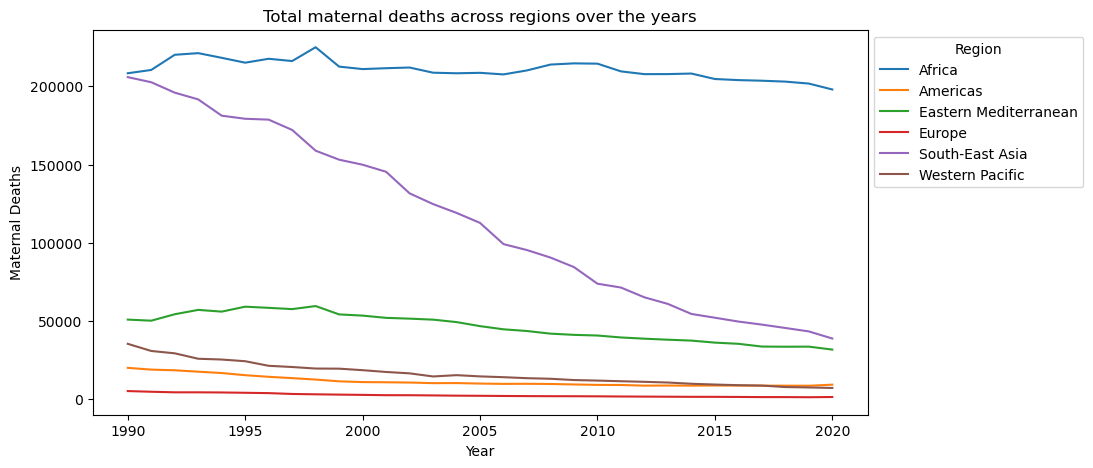

In [197]:
# Total maternal death in each region

# Grouping the regions by year to show total number of maternal deaths in each region over the years
Maternal_deaths = maternal_MR.groupby(['region', 'year']).sum(numeric_only=True).reset_index()

# Line plot for maternal death across regions over the years
plt.figure(figsize=(10, 5))
[plt.plot(value['year'], value['deaths'], label=region) for region, value in Maternal_deaths.groupby('region')]

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Maternal Deaths')
plt.title('Total maternal deaths across regions over the years')
plt.legend(title="Region", bbox_to_anchor=(1.00, 1), loc='upper left')
plt.show()

#### Scatter plot to show IMR and U5MR with maternal death

Text(0.05, 0.95, 'r = 0.92\nr² = 0.84')

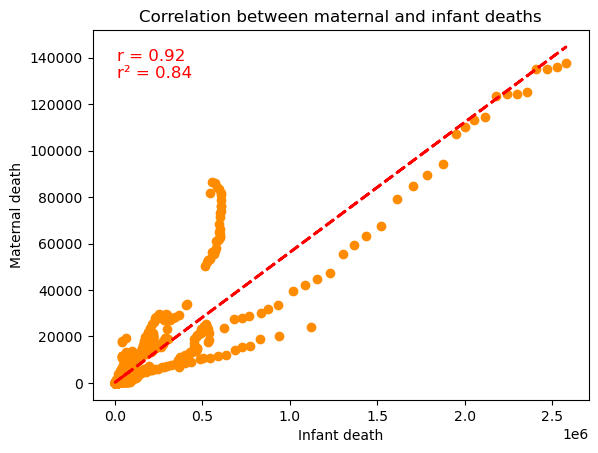

In [201]:
# Preparing the data
scplt_IMR_maternal = merged_df.dropna(subset=['infant_deaths', 'maternal_death'])

# Scatter plot to show relationship between infant and maternal deaths
plt.scatter(scplt_IMR_maternal['infant_deaths'], scplt_IMR_maternal['maternal_death'], color='#FF8C00')
plt.ylabel ("Maternal death")
plt.xlabel ("Infant death")
plt.title ("Correlation between maternal and infant deaths");

# Calculate equation for trendline
z = np.polyfit(scplt_IMR_maternal['infant_deaths'], scplt_IMR_maternal['maternal_death'], 1)
p = np.poly1d(z)

# Adding trendline to plot
plt.plot(scplt_IMR_maternal['infant_deaths'], p(scplt_IMR_maternal['infant_deaths']), color='red', linestyle='--', linewidth=2)

# Calculating r and r^2
correlation_matrix = np.corrcoef(scplt_IMR_maternal['infant_deaths'], scplt_IMR_maternal['maternal_death'])
r = correlation_matrix[0, 1]
r2 = r ** 2

# Displaying r and r^2 on the plot
plt.text(0.05, 0.95, f"r = {r:.2f}\nr² = {r2:.2f}", transform=plt.gca().transAxes, 
         verticalalignment='top', fontsize=12, color='red')

Text(0.05, 0.95, 'r = 0.30\nr² = 0.09')

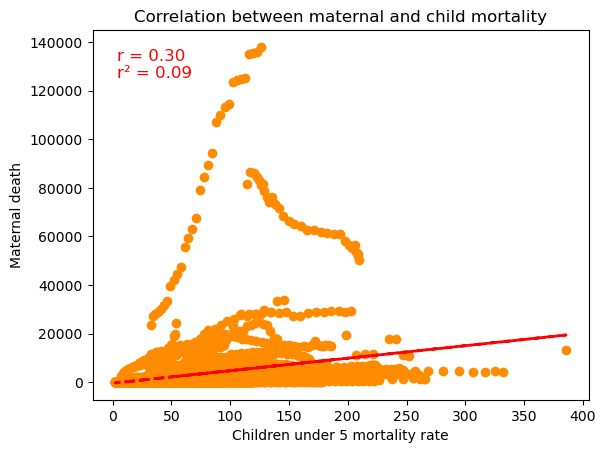

In [204]:
# Preparing the data
scplt_U5MR_maternal = merged_df.dropna(subset=['under_5_MR', 'maternal_death'])

# Scatter plot to show relationship between children under 5 years and maternal deaths
plt.scatter(scplt_U5MR_maternal['under_5_MR'], scplt_U5MR_maternal['maternal_death'], color='#FF8C00')
plt.ylabel ("Maternal death")
plt.xlabel ("Children under 5 mortality rate")
plt.title ("Correlation between maternal and child mortality");

# Calculate equation for trendline
z = np.polyfit(scplt_U5MR_maternal['under_5_MR'], scplt_U5MR_maternal['maternal_death'], 1)
p = np.poly1d(z)

# Adding trendline to plot
plt.plot(scplt_U5MR_maternal['under_5_MR'], p(scplt_U5MR_maternal['under_5_MR']), color='red', linestyle='--', linewidth=2)

# Calculating r and r^2
correlation_matrix = np.corrcoef(scplt_IMR_maternal['under_5_MR'], scplt_IMR_maternal['maternal_death'])
r = correlation_matrix[0, 1]
r2 = r ** 2

# Displaying r and r^2 on the plot
plt.text(0.05, 0.95, f"r = {r:.2f}\nr² = {r2:.2f}", transform=plt.gca().transAxes, 
         verticalalignment='top', fontsize=12, color='red')

#### Scatter plot to show IMR and U5MR with maternal death in Africa

Text(0.05, 0.95, 'r = 0.97\nr² = 0.94')

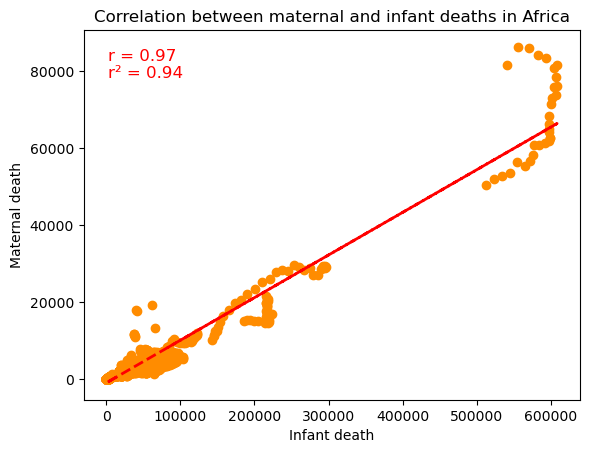

In [208]:
# Preparing the data
scplt_IMR_maternal_AFR = merged_AFR.dropna(subset=['infant_deaths', 'maternal_death'])

# Scatter plot to show relationship between infant and maternal deaths
plt.scatter(scplt_IMR_maternal_AFR['infant_deaths'], scplt_IMR_maternal_AFR['maternal_death'], color='#FF8C00')
plt.ylabel ("Maternal death")
plt.xlabel ("Infant death")
plt.title ("Correlation between maternal and infant deaths in Africa");

# Calculate equation for trendline
z = np.polyfit(scplt_IMR_maternal_AFR['infant_deaths'], scplt_IMR_maternal_AFR['maternal_death'], 1)
p = np.poly1d(z)

# Adding trendline to plot
plt.plot(scplt_IMR_maternal_AFR['infant_deaths'], p(scplt_IMR_maternal_AFR['infant_deaths']), color='red', linestyle='--', linewidth=2)

# Calculating r and r^2
correlation_matrix = np.corrcoef(scplt_IMR_maternal_AFR['infant_deaths'], scplt_IMR_maternal_AFR['maternal_death'])
r = correlation_matrix[0, 1]
r2 = r ** 2

# Displaying r and r^2 on the plot
plt.text(0.05, 0.95, f"r = {r:.2f}\nr² = {r2:.2f}", transform=plt.gca().transAxes, 
         verticalalignment='top', fontsize=12, color='red')

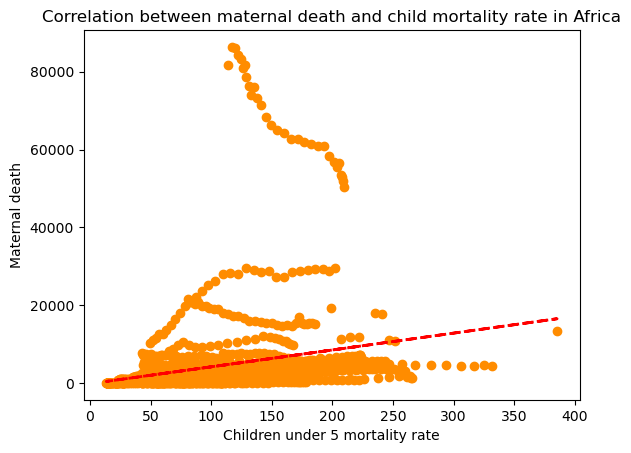

In [209]:
# Preparing the data
scplt_U5MR_maternal_AFR = merged_AFR.dropna(subset=['under_5_MR', 'maternal_death'])

# Scatter plot to show relationship between children under 5 years and maternal deaths
plt.scatter(scplt_U5MR_maternal_AFR['under_5_MR'], scplt_U5MR_maternal_AFR['maternal_death'], color='#FF8C00')
plt.ylabel ("Maternal death")
plt.xlabel ("Children under 5 mortality rate")
plt.title ("Correlation between maternal death and child mortality rate in Africa");

# Calculate equation for trendline
z = np.polyfit(scplt_U5MR_maternal_AFR['under_5_MR'], scplt_U5MR_maternal_AFR['maternal_death'], 1)
p = np.poly1d(z)

# Adding trendline to plot
plt.plot(scplt_U5MR_maternal_AFR['under_5_MR'], p(scplt_U5MR_maternal_AFR['under_5_MR']), color='red', linestyle='--', linewidth=2)

# Calculating r and r^2
correlation_matrix = np.corrcoef(scplt_U5MR_maternal_AFR['under_5_MR'], scplt_U5MR_maternal_AFR['maternal_death'])
r = correlation_matrix[0, 1]
r2 = r ** 2

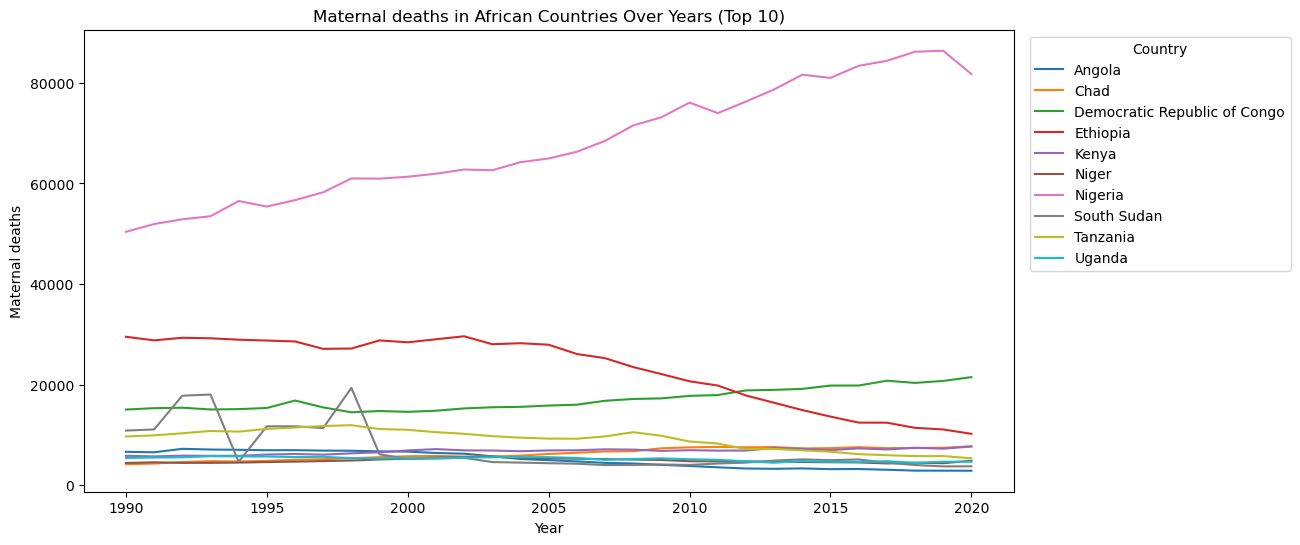

In [212]:
# Top 10 african countries with the highest maternal death
top_10_countries_maternal = maternal_AFR.groupby('country')['deaths'].sum().nlargest(10).index

# Filter and reshape data for only the top 10 countries
top_10_data_maternal = (maternal_AFR[maternal_AFR['country'].isin(top_10_countries_maternal)]
              .groupby(['country', 'year'])['deaths'].sum().reset_index())

# Plotting maternal death for top 10 countries
plt.figure(figsize=(12, 6))
[plt.plot(data['year'], data['deaths'], label=country) for country, data in top_10_data_maternal.groupby('country')]
plt.xlabel('Year')
plt.ylabel('Maternal deaths')
plt.title('Maternal deaths in African Countries Over Years (Top 10)')
plt.legend(title="Country", bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

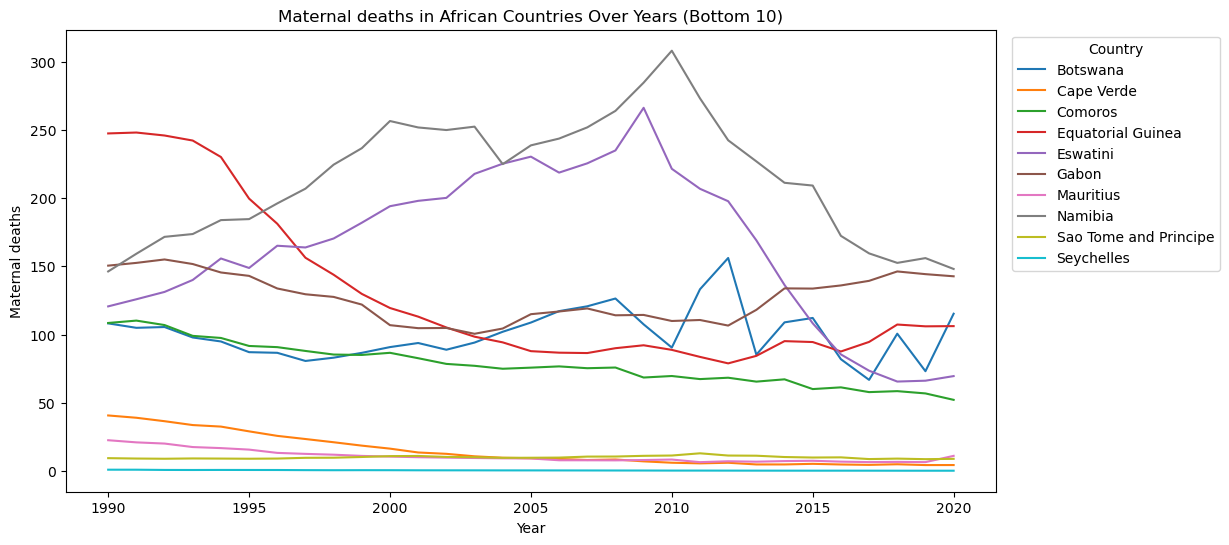

In [215]:
# Bottom 10 african countries with the highest maternal death
bottom_10_countries_maternal = maternal_AFR.groupby('country')['deaths'].sum().nsmallest(10).index

# Filter and reshape data for only the top 10 countries
bottom_10_data_maternal = (maternal_AFR[maternal_AFR['country'].isin(bottom_10_countries_maternal)]
              .groupby(['country', 'year'])['deaths'].sum().reset_index())

# Plotting maternal death for bottom 10 countries
plt.figure(figsize=(12, 6))
[plt.plot(data['year'], data['deaths'], label=country) for country, data in bottom_10_data_maternal.groupby('country')]
plt.xlabel('Year')
plt.ylabel('Maternal deaths')
plt.title('Maternal deaths in African Countries Over Years (Bottom 10)')
plt.legend(title="Country", bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

**INSIGHTS**

The scatter plots show relationships between maternal death and infant death/child mortality rate that were already recognised in the correlation matrices. Maternal death almost always resulted in the death of the infant (r= 0.97).

Looking through African countries with the highest and lowest maternal deaths, it is unsuprising that countries such as Nigeria, Niger, Angola, DRC and Ethiopia, with high infant and child mortality also recorded high maternal deaths. 

Also, African countries like Seychelles, Botswana, Cape Verde and Mauritius, with low infant and child mortality also had low maternal deaths

### Attendance of skilled health staff during birth

In [222]:
# Grouping the year labels into smaller intervals, a 3-year interval with the aim of creating a better visual
staff_birth['year_group'] = (staff_birth['year']//3) * 3

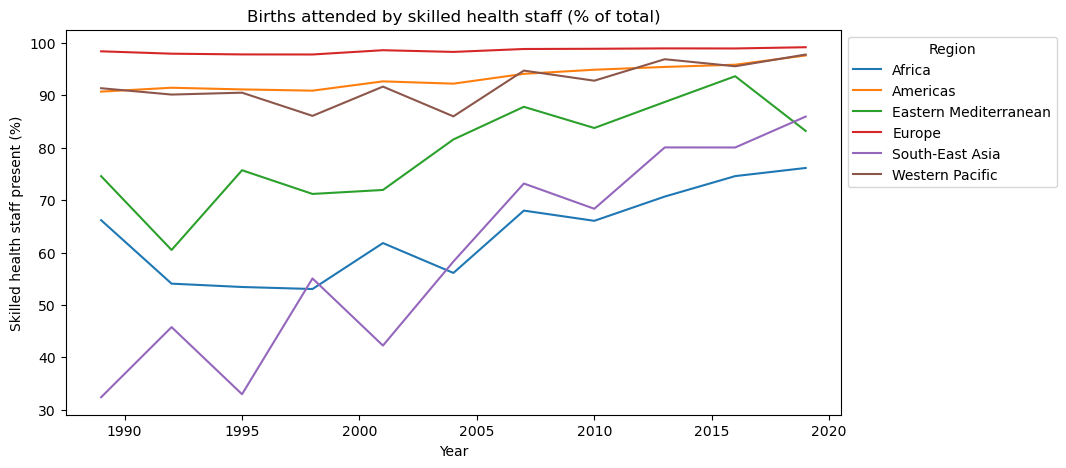

In [224]:
# Births attended by skilled heath staff (% of total) in each region

# Grouping the regions by year to show % of births attended by skilled health staff in each region over the years
skilled_staff_present = staff_birth.groupby(['region', 'year_group']).mean(numeric_only=True).reset_index()

# Line plot for mortality rate for children under 5 across regions over the years
plt.figure(figsize=(10, 5))
[plt.plot(value['year_group'], value['births'], label=region) for region, value in skilled_staff_present.groupby('region')]

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Skilled health staff present (%)')
plt.title('Births attended by skilled health staff (% of total)')
plt.legend(title="Region", bbox_to_anchor=(1.00, 1), loc='upper left')
plt.show()

#### Scatter plot to show relationship between IMR and U5MR with presence of skilled health workers at birth

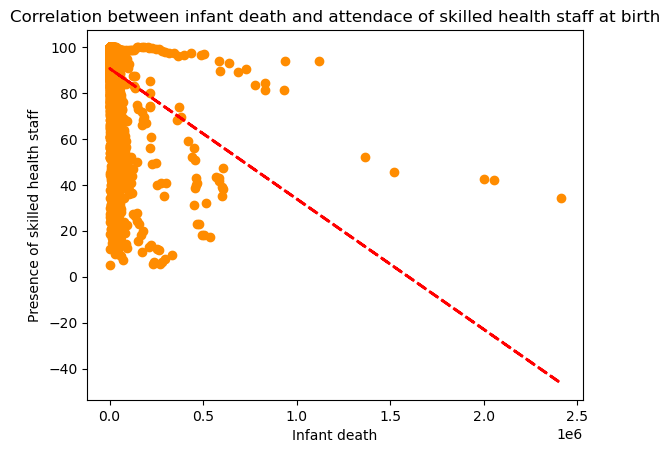

In [227]:
# Preparing the data
scplt_IMR_health_staff = merged_df.dropna(subset=['infant_deaths', 'skilled_health_staff'])

# Scatter plot to show relationship between infant death and presence of skilled health staff at birth
plt.scatter(scplt_IMR_health_staff['infant_deaths'], scplt_IMR_health_staff['skilled_health_staff'], color='#FF8C00')
plt.ylabel ("Presence of skilled health staff")
plt.xlabel ("Infant death")
plt.title ("Correlation between infant death and attendace of skilled health staff at birth");

# Calculate equation for trendline
z = np.polyfit(scplt_IMR_health_staff['infant_deaths'], scplt_IMR_health_staff['skilled_health_staff'], 1)
p = np.poly1d(z)

# Adding trendline to plot
plt.plot(scplt_IMR_health_staff['infant_deaths'], p(scplt_IMR_health_staff['infant_deaths']), color='red', linestyle='--', linewidth=2)

# Calculating r and r^2
correlation_matrix = np.corrcoef(scplt_IMR_health_staff['infant_deaths'], scplt_IMR_health_staff['skilled_health_staff'])
r = correlation_matrix[0, 1]
r2 = r ** 2

Text(0.8, 0.95, 'r = -0.81\nr² = 0.66')

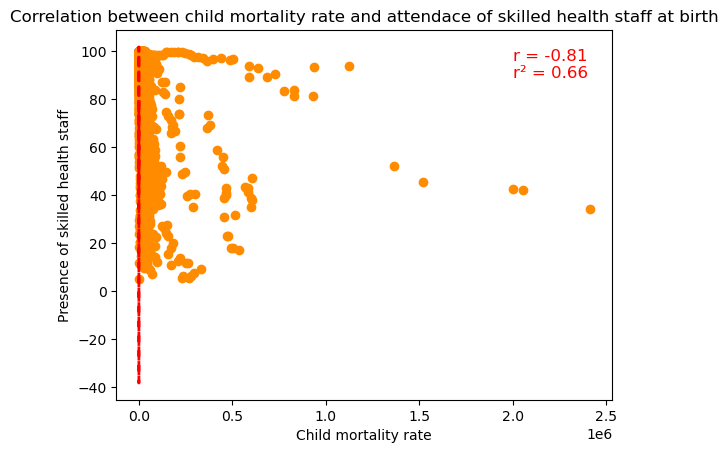

In [230]:
# Preparing the data
scplt_U5MR_health_staff = merged_df.dropna(subset=['under_5_MR', 'skilled_health_staff'])

# Scatter plot to show relationship between child mortality rate and presence of skilled health staff at birth
plt.scatter(scplt_U5MR_health_staff['infant_deaths'], scplt_U5MR_health_staff['skilled_health_staff'], color='#FF8C00')
plt.ylabel ("Presence of skilled health staff")
plt.xlabel ("Child mortality rate")
plt.title ("Correlation between child mortality rate and attendace of skilled health staff at birth");

# Calculate equation for trendline
z = np.polyfit(scplt_U5MR_health_staff['under_5_MR'], scplt_U5MR_health_staff['skilled_health_staff'], 1)
p = np.poly1d(z)

# Adding trendline to plot
plt.plot(scplt_U5MR_health_staff['under_5_MR'], p(scplt_U5MR_health_staff['under_5_MR']), color='red', linestyle='--', linewidth=2)

# Calculating r and r^2
correlation_matrix = np.corrcoef(scplt_U5MR_health_staff['under_5_MR'], scplt_U5MR_health_staff['skilled_health_staff'])
r = correlation_matrix[0, 1]
r2 = r ** 2

# Displaying r and r^2 on the plot
plt.text(0.8, 0.95, f"r = {r:.2f}\nr² = {r2:.2f}", transform=plt.gca().transAxes, 
         verticalalignment='top', fontsize=12, color='red')

#### Attendance of skilled health staff during birth in Africa

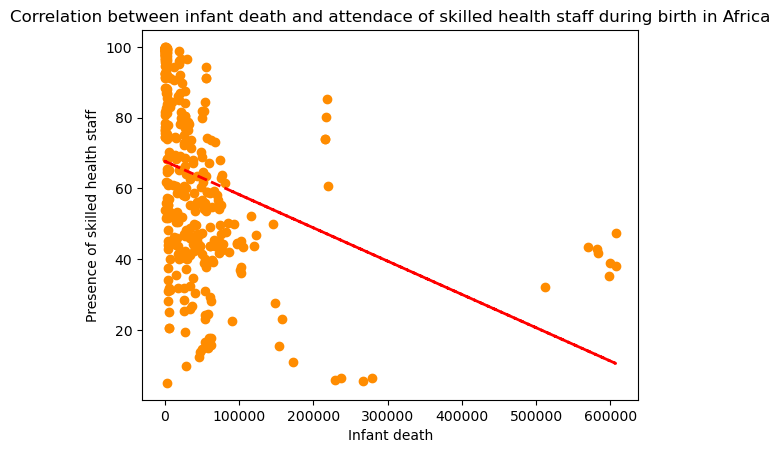

In [234]:
# Preparing the data
scplt_IMR_health_staff_AFR = merged_AFR.dropna(subset=['infant_deaths', 'skilled_health_staff'])

# Scatter plot to show relationship between infant death and presence of skilled health staff at birth
plt.scatter(scplt_IMR_health_staff_AFR['infant_deaths'], scplt_IMR_health_staff_AFR['skilled_health_staff'], color='#FF8C00')
plt.ylabel ("Presence of skilled health staff")
plt.xlabel ("Infant death")
plt.title ("Correlation between infant death and attendace of skilled health staff during birth in Africa");

# Calculate equation for trendline
z = np.polyfit(scplt_IMR_health_staff_AFR['infant_deaths'], scplt_IMR_health_staff_AFR['skilled_health_staff'], 1)
p = np.poly1d(z)

# Adding trendline to plot
plt.plot(scplt_IMR_health_staff_AFR['infant_deaths'], p(scplt_IMR_health_staff_AFR['infant_deaths']), color='red', linestyle='--', linewidth=2)

# Calculating r and r^2
correlation_matrix = np.corrcoef(scplt_IMR_health_staff_AFR['infant_deaths'], scplt_IMR_health_staff_AFR['skilled_health_staff'])
r = correlation_matrix[0, 1]
r2 = r ** 2

Text(0.05, 0.95, 'r = -0.75\nr² = 0.57')

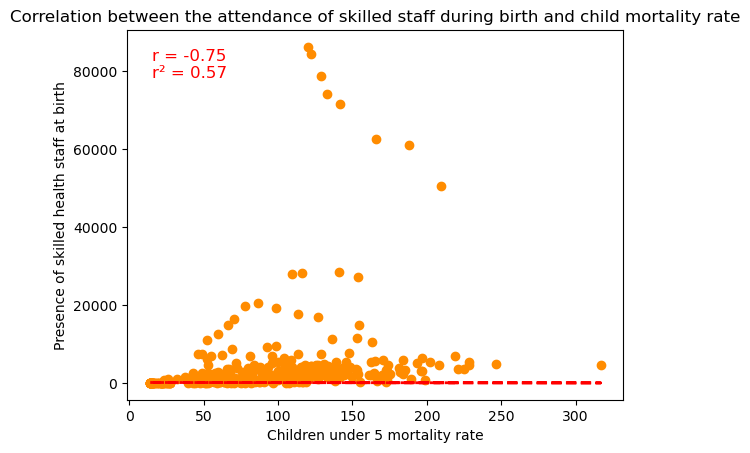

In [237]:
# Preparing the data
scplt_U5MR_health_staff_AFR = merged_AFR.dropna(subset=['under_5_MR', 'skilled_health_staff'])

# Scatter plot to show relationship between children under 5 years and maternal deaths
plt.scatter(scplt_U5MR_health_staff_AFR['under_5_MR'], scplt_U5MR_health_staff_AFR['maternal_death'], color='#FF8C00')
plt.ylabel ("Presence of skilled health staff at birth")
plt.xlabel ("Children under 5 mortality rate")
plt.title ("Correlation between the attendance of skilled staff during birth and child mortality rate");

# Calculate equation for trendline
z = np.polyfit(scplt_U5MR_health_staff_AFR ['under_5_MR'], scplt_U5MR_health_staff_AFR ['skilled_health_staff'], 1)
p = np.poly1d(z)

# Adding trendline to plot
plt.plot(scplt_U5MR_health_staff_AFR ['under_5_MR'], p(scplt_U5MR_health_staff_AFR ['under_5_MR']), color='red', linestyle='--', linewidth=2)

# Calculating r and r^2
correlation_matrix = np.corrcoef(scplt_U5MR_health_staff_AFR ['under_5_MR'], scplt_U5MR_health_staff_AFR ['skilled_health_staff'])
r = correlation_matrix[0, 1]
r2 = r ** 2

# Displaying r and r^2 on the plot
plt.text(0.05, 0.95, f"r = {r:.2f}\nr² = {r2:.2f}", transform=plt.gca().transAxes, 
         verticalalignment='top', fontsize=12, color='red')

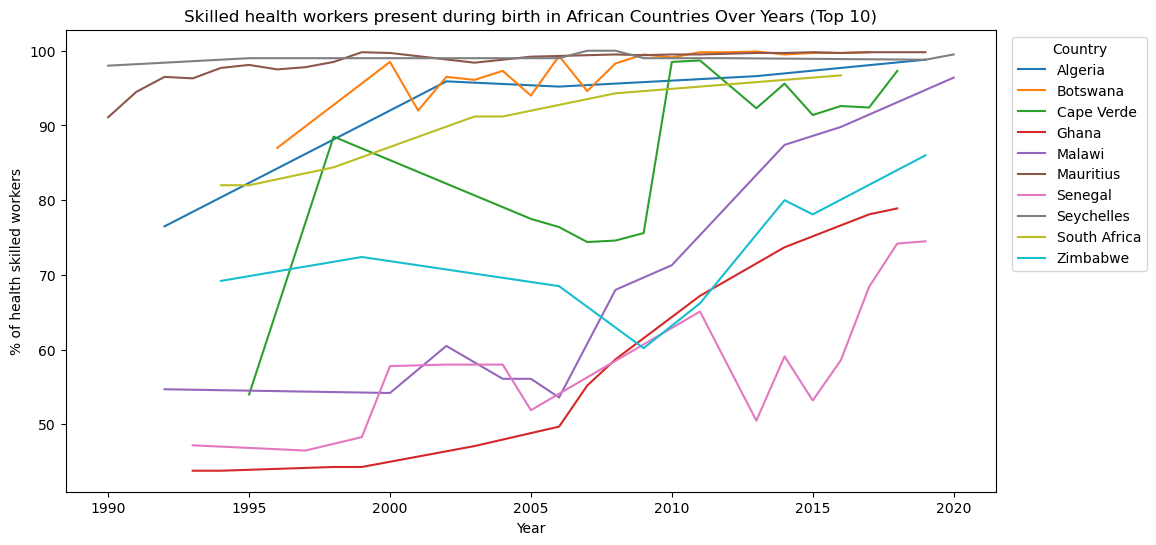

In [240]:
# Top 10 african countries with the highest % of skilled health workers present at birth
top_10_countries_staff = staff_AFR.groupby('country')['births'].sum().nlargest(10).index

# Filter and reshape data for only the top 10 countries
top_10_data_staff = (staff_AFR[staff_AFR['country'].isin(top_10_countries_staff)]
              .groupby(['country', 'year'])['births'].sum().reset_index())

# Plotting maternal death for top 10 countries
plt.figure(figsize=(12, 6))
[plt.plot(data['year'], data['births'], label=country) for country, data in top_10_data_staff.groupby('country')]
plt.xlabel('Year')
plt.ylabel('% of health skilled workers')
plt.title('Skilled health workers present during birth in African Countries Over Years (Top 10)')
plt.legend(title="Country", bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

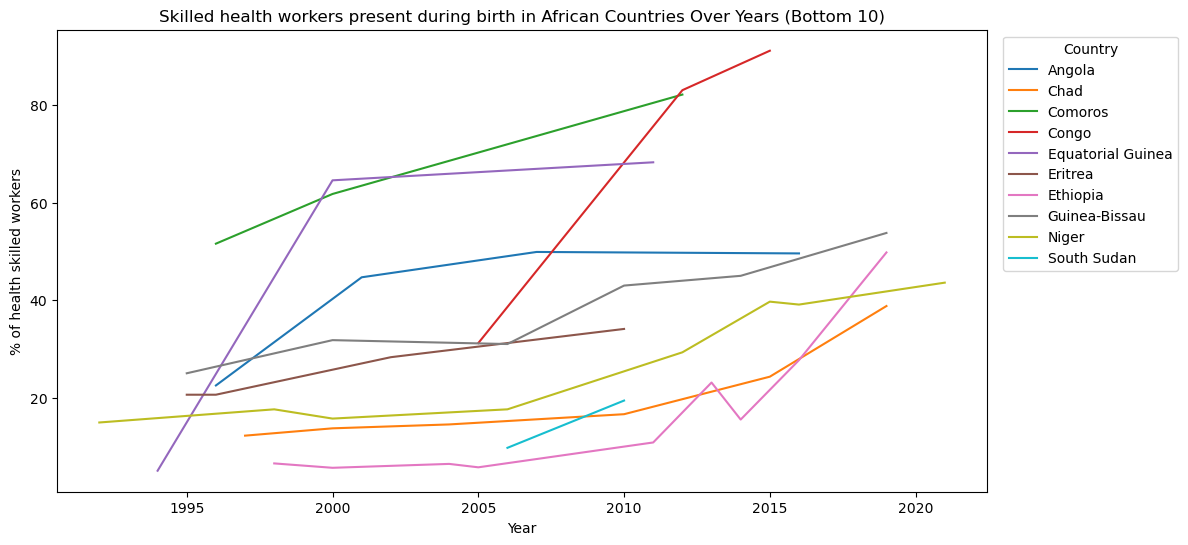

In [243]:
# Bottom 10 african countries with the highest % of skilled health workers present at birth
bottom_10_countries_staff = staff_AFR.groupby('country')['births'].sum().nsmallest(10).index

# Filter and reshape data for only the top 10 countries
bottom_10_data_staff = (staff_AFR[staff_AFR['country'].isin(bottom_10_countries_staff)]
              .groupby(['country', 'year'])['births'].sum().reset_index())

# Plotting maternal death for top 10 countries
plt.figure(figsize=(12, 6))
[plt.plot(data['year'], data['births'], label=country) for country, data in bottom_10_data_staff.groupby('country')]
plt.xlabel('Year')
plt.ylabel('% of health skilled workers')
plt.title('Skilled health workers present during birth in African Countries Over Years (Bottom 10)')
plt.legend(title="Country", bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

As regards the percentage of births attended to by skilled health care workers, Europe has maintained a high level (ca. 100%) since 1990. While South_East Asia initially had the lowest values between 1990 - 1997, this region improved the attendance of skilled health workers supervising births, thus resulting in Africa being the region with the lowest skilled health workers attending or supervising births since 2005.

A negative correlation was observed between the presence of skilled health staff during the birth and infant/child mortality, meaning that regions or countries with higher percent of skilled health workers resulted in lower deaths of the infant and children.

Thus, this explains why Europe has the lowest infant and child deaths, and Africa with the highest.

Also, from the chart, African countries like Seychelles, Cape Verde, Botswana and Mauritius with low infant & child mortality rates, had higher percent of skilled health staff present during the birth of a child. This is exact opposite for Angola,  Niger and Ethiopia, with high infant and child mortality.

### Relatonship between infant and child mortality with health insurance 

Text(0.8, 0.95, 'r = -0.25\nr² = 0.06')

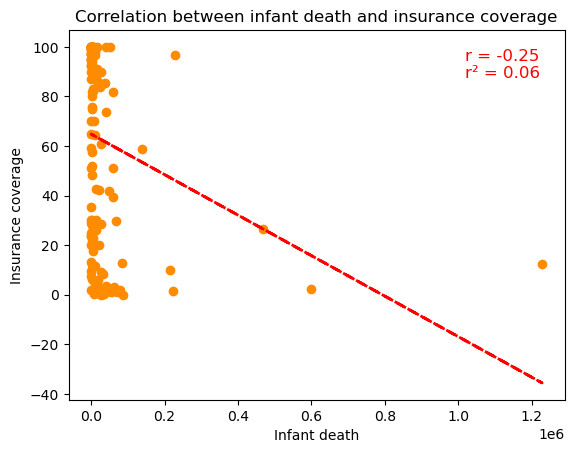

In [248]:
# Preparing the data
scplt_IMR_insurance = merged_df.dropna(subset=['infant_deaths', 'insurance_cover'])

# Scatter plot to show relationship between infant death and insurance coverage
plt.scatter(scplt_IMR_insurance['infant_deaths'], scplt_IMR_insurance['insurance_cover'], color='#FF8C00')
plt.ylabel ("Insurance coverage")
plt.xlabel ("Infant death")
plt.title ("Correlation between infant death and insurance coverage");

# Calculate equation for trendline
z = np.polyfit(scplt_IMR_insurance['infant_deaths'], scplt_IMR_insurance['insurance_cover'], 1)
p = np.poly1d(z)

# Adding trendline to plot
plt.plot(scplt_IMR_insurance['infant_deaths'], p(scplt_IMR_insurance['infant_deaths']), color='red', linestyle='--', linewidth=2)

# Calculating r and r^2
correlation_matrix = np.corrcoef(scplt_IMR_insurance['infant_deaths'], scplt_IMR_insurance['insurance_cover'])
r = correlation_matrix[0, 1]
r2 = r ** 2

# Displaying r and r^2 on the plot
plt.text(0.8, 0.95, f"r = {r:.2f}\nr² = {r2:.2f}", transform=plt.gca().transAxes, 
         verticalalignment='top', fontsize=12, color='red')

Text(0.8, 0.95, 'r = -0.73\nr² = 0.54')

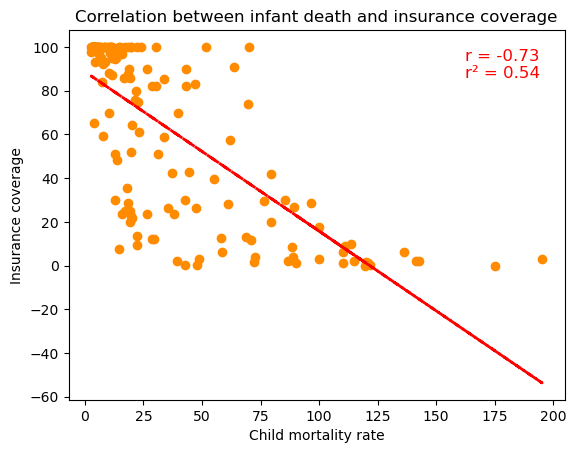

In [251]:
# Preparing the data
scplt_IMR_insurance = merged_df.dropna(subset=['under_5_MR', 'insurance_cover'])

# Scatter plot to show relationship between child mortality rate and insurance coverage
plt.scatter(scplt_IMR_insurance['under_5_MR'], scplt_IMR_insurance['insurance_cover'], color='#FF8C00')
plt.ylabel ("Insurance coverage")
plt.xlabel ("Child mortality rate")
plt.title ("Correlation between infant death and insurance coverage");

# Calculate equation for trendline
z = np.polyfit(scplt_IMR_insurance['under_5_MR'], scplt_IMR_insurance['insurance_cover'], 1)
p = np.poly1d(z)

# Adding trendline to plot
plt.plot(scplt_IMR_insurance['under_5_MR'], p(scplt_IMR_insurance['under_5_MR']), color='red', linestyle='--', linewidth=2)

# Calculating r and r^2
correlation_matrix = np.corrcoef(scplt_IMR_insurance['under_5_MR'], scplt_IMR_insurance['insurance_cover'])
r = correlation_matrix[0, 1]
r2 = r ** 2

# Displaying r and r^2 on the plot
plt.text(0.8, 0.95, f"r = {r:.2f}\nr² = {r2:.2f}", transform=plt.gca().transAxes, 
         verticalalignment='top', fontsize=12, color='red')

#### Relatonship between infant and child mortality with health insurance in Africa

Text(0.8, 0.95, 'r = -0.20\nr² = 0.04')

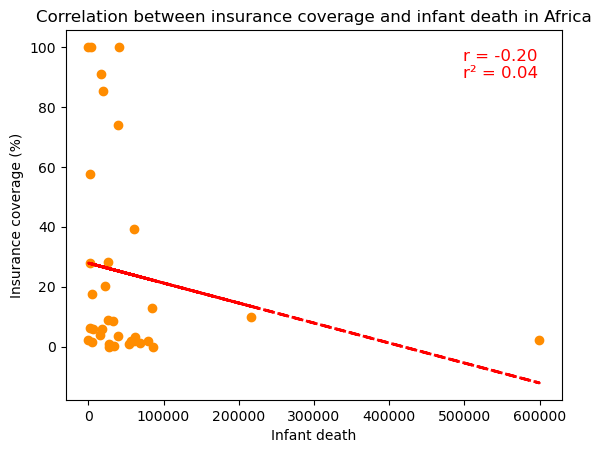

In [255]:
# Preparing the data
scplt_IMR_insurance_AFR = merged_AFR.dropna(subset=['infant_deaths', 'insurance_cover'])

# Scatter plot to show relationship between infant and maternal deaths
plt.scatter(scplt_IMR_insurance_AFR['infant_deaths'], scplt_IMR_insurance_AFR['insurance_cover'], color='#FF8C00')
plt.ylabel ("Insurance coverage (%)")
plt.xlabel ("Infant death")
plt.title ("Correlation between insurance coverage and infant death in Africa");

# Calculate equation for trendline
z = np.polyfit(scplt_IMR_insurance_AFR['infant_deaths'], scplt_IMR_insurance_AFR['insurance_cover'], 1)
p = np.poly1d(z)

# Adding trendline to plot
plt.plot(scplt_IMR_insurance_AFR['infant_deaths'], p(scplt_IMR_insurance_AFR['infant_deaths']), color='red', linestyle='--', linewidth=2)

# Calculating r and r^2
correlation_matrix = np.corrcoef(scplt_IMR_insurance_AFR['infant_deaths'], scplt_IMR_insurance_AFR['insurance_cover'])
r = correlation_matrix[0, 1]
r2 = r ** 2

# Displaying r and r^2 on the plot
plt.text(0.8, 0.95, f"r = {r:.2f}\nr² = {r2:.2f}", transform=plt.gca().transAxes, 
         verticalalignment='top', fontsize=12, color='red')

Text(0.8, 0.95, 'r = -0.63\nr² = 0.39')

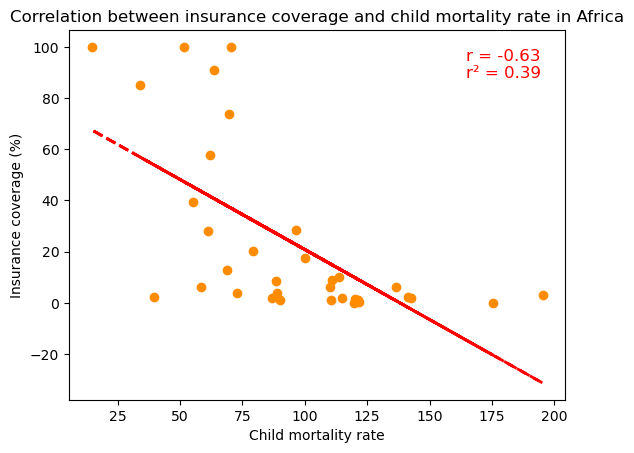

In [258]:
# Preparing the data
scplt_U5MR_insurance_AFR = merged_AFR.dropna(subset=['under_5_MR', 'insurance_cover'])

# Scatter plot to show relationship between infant and maternal deaths
plt.scatter(scplt_U5MR_insurance_AFR['under_5_MR'], scplt_U5MR_insurance_AFR['insurance_cover'], color='#FF8C00')
plt.ylabel ("Insurance coverage (%)")
plt.xlabel ("Child mortality rate")
plt.title ("Correlation between insurance coverage and child mortality rate in Africa");

# Calculate equation for trendline
z = np.polyfit(scplt_U5MR_insurance_AFR['under_5_MR'], scplt_U5MR_insurance_AFR['insurance_cover'], 1)
p = np.poly1d(z)

# Adding trendline to plot
plt.plot(scplt_U5MR_insurance_AFR['under_5_MR'], p(scplt_U5MR_insurance_AFR['under_5_MR']), color='red', linestyle='--', linewidth=2)

# Calculating r and r^2
correlation_matrix = np.corrcoef(scplt_U5MR_insurance_AFR['under_5_MR'], scplt_U5MR_insurance_AFR['insurance_cover'])
r = correlation_matrix[0, 1]
r2 = r ** 2

# Displaying r and r^2 on the plot
plt.text(0.8, 0.95, f"r = {r:.2f}\nr² = {r2:.2f}", transform=plt.gca().transAxes, 
         verticalalignment='top', fontsize=12, color='red')

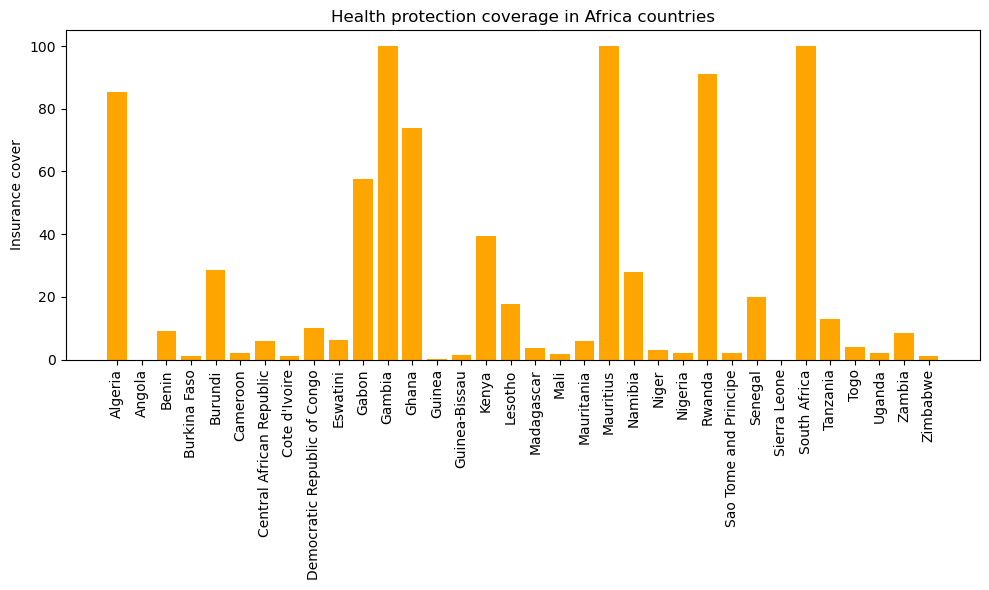

In [261]:
# Data for plotting
countries = insurance_AFR['country']
insurance_value = insurance_AFR['insurance_cover']

# Set bar width and positions
index = np.arange(len(countries))
bar_width = 0.8

# Plotting a clustered column chart
fig, ax = plt.subplots(figsize=(10, 6))
bar = ax.bar(index, insurance_value, bar_width, color = 'orange')

# Customize labels and layout
#ax.set_xlabel('Country')
ax.set_ylabel('Insurance cover')
ax.set_title('Health protection coverage in Africa countries')
ax.set_xticks(index)
ax.set_xticklabels(countries, rotation=90, ha='center')
plt.tight_layout()
plt.show()

As seen in the presence of skilled health staff during birth, the availability of health insurance had a negative correlation with infant and child mortality.  In Africa, countries such as Angola, Niger and NIgeria, with high mortality rates had little to no health insurance coverage. Whereas, Mauritius, a country previously stated to have low infant and child mortality, had 100% health insurance coverage as at 2010.

### Vaccination

In [266]:
vaccination_chart = vaccination_df.groupby('region')[['BCG', 'HepB3', 'Hib3', 'IPV1', 'MCV1',
       'PCV3', 'Pol3', 'RCV1', 'RotaC', 'YFV', 'DTP3']].mean()
vaccination_chart

,BCG,HepB3,Hib3,IPV1,MCV1,PCV3,Pol3,RCV1,RotaC,YFV,DTP3
region,,,,,,,,,,,
Africa,84.051335,79.318182,79.648175,66.654545,71.152635,75.080110,72.709788,87.360190,75.449275,58.163223,72.720055
Americas,93.086806,86.794078,88.001337,86.111111,89.188393,79.586957,88.112007,91.483736,77.871486,58.025000,88.118750
Eastern Mediterranean,85.131034,85.103053,86.129683,82.413534,81.334821,84.337580,82.236607,90.456989,77.837398,NaN,81.930060
Europe,90.637563,87.600771,89.210478,95.205128,91.103512,86.367609,93.588670,91.733006,73.040462,NaN,93.085591
South-East Asia,90.835294,81.995868,86.300971,71.424658,84.250000,57.935484,86.382353,90.765625,52.636364,NaN,84.800000
Western Pacific,90.047682,84.885599,86.918854,87.045714,85.231039,75.545977,86.280093,89.387978,70.000000,NaN,86.212963


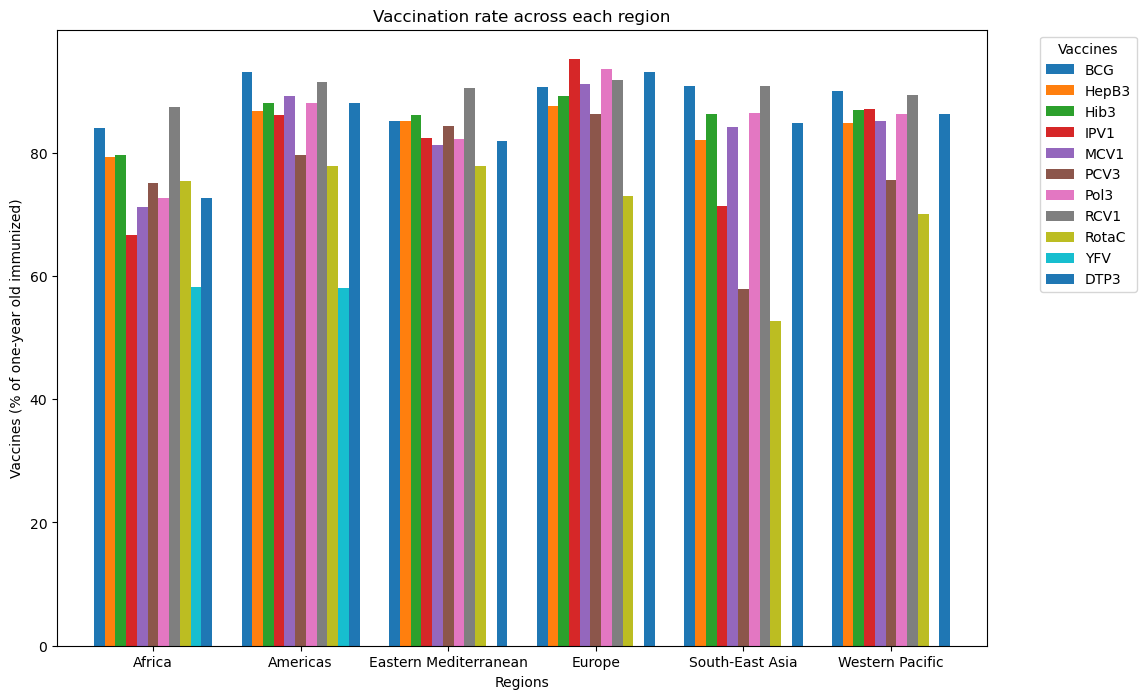

In [267]:
#creating a visual to show the relationship between loyalty group and monthly spend in the data
vaccination_chart.plot(kind='bar', figsize=(12, 8), width=0.8, rot=0) #rot=0 to show the x-axis label better.
plt.title('Vaccination rate across each region')
plt.xlabel('Regions')
plt.ylabel('Vaccines (% of one-year old immunized)')
plt.legend(title='Vaccines', bbox_to_anchor=(1.05, 1), loc='upper left') # displaying legend outside the box
plt.show()

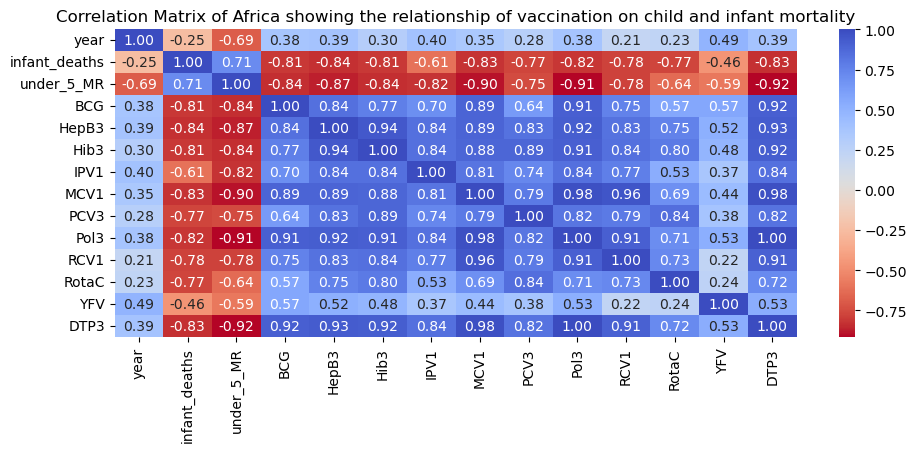

In [270]:
# Merging vaccination to pre-exisitng table to determine relationship between vaccinations and deaths
xxx_merged = pd.merge(merged_AFR, vaccination_df, on=['code', 'year'], how='outer')

# Calculate the correlation matrix
correlation_matrix_vacc = xxx_merged[["year",'infant_deaths', 'under_5_MR', 'BCG', 'HepB3', 'Hib3', 'IPV1', 'MCV1', 'PCV3', 'Pol3',
       'RCV1', 'RotaC', 'YFV', 'DTP3']].corr()
                                 
#Correlation matrix plot
plt.figure(figsize=(11, 4))
sns.heatmap(correlation_matrix_vacc.corr(numeric_only=True), cmap="coolwarm_r", fmt='.2f', annot=True)

#Add title
plt.title('Correlation Matrix of Africa showing the relationship of vaccination on child and infant mortality')
plt.show()

In [273]:
vaccination_AFR = vaccination_df[vaccination_df.region_code == 'AFR']

vaccination_chart_AFR = vaccination_AFR.groupby('country')[['BCG', 'HepB3', 'Hib3', 'IPV1', 'MCV1',
       'PCV3', 'Pol3', 'RCV1', 'RotaC', 'YFV', 'DTP3']].mean().reset_index()

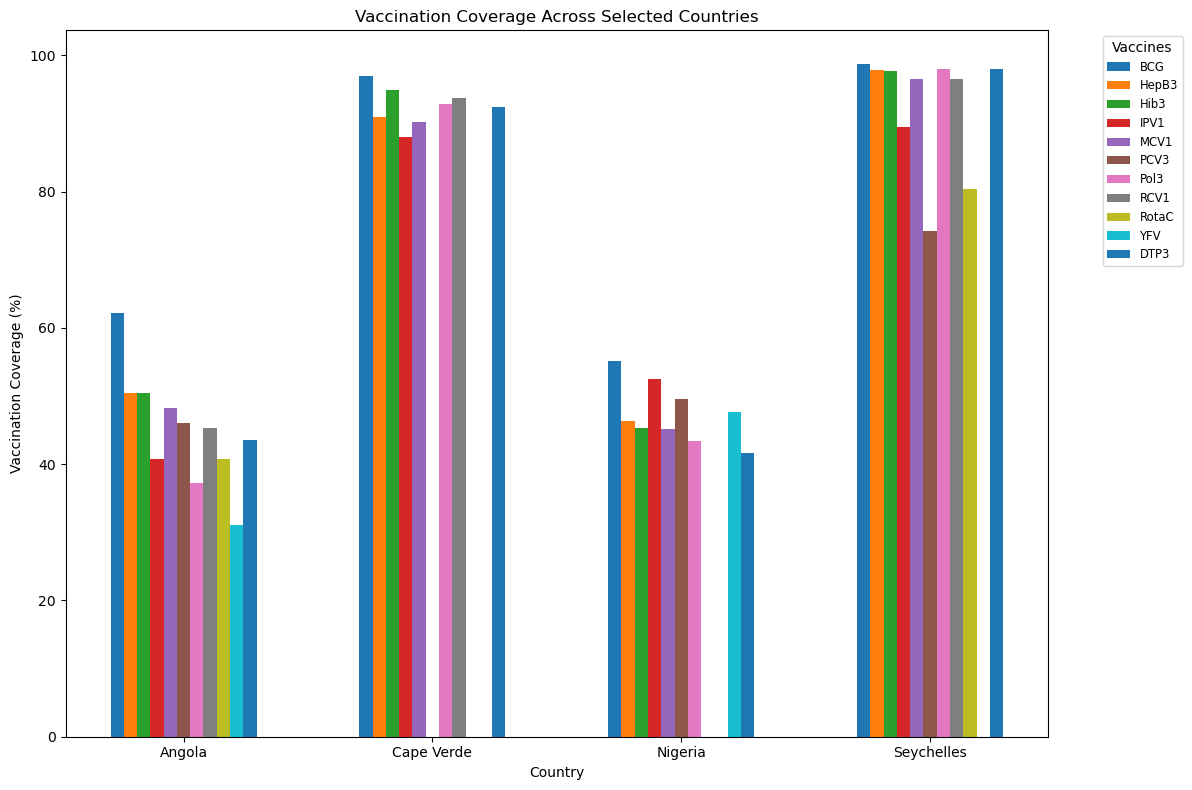

In [274]:
# Filter the DataFrame for specific countries
countries_to_filter = ['Nigeria', 'Angola', 'Cape Verde', 'Seychelles']
filtered_df1 = vaccination_chart_AFR[vaccination_chart_AFR['country'].isin(countries_to_filter)]

# Set country as the index for easier plotting
filtered_df1.set_index('country', inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Define positions and width
x = np.arange(len(filtered_df1.index)) * 1.5  # Add space between country groups
width = 0.08  # Narrower bars

# Plot each vaccine's data
for i, vaccine in enumerate(filtered_df1.columns):
    ax.bar(x + i * width, filtered_df1[vaccine], width, label=vaccine)

# Customize the chart
ax.set_xlabel('Country')
ax.set_ylabel('Vaccination Coverage (%)')
ax.set_title('Vaccination Coverage Across Selected Countries')
ax.set_xticks(x + width * (len(filtered_df1.columns) - 1) / 2)
ax.set_xticklabels(filtered_df1.index)
ax.legend(title='Vaccines', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

From the correlation matrix, it is evident that there is a negative correlation between vaccination and infant/child mortality, which is expected. Proper vaccination/immunization reduces child and infant mortality.

With vaccination coverage varying amongst regions in the world due to the various type of prevailing diseases fought against such as YFV for yellow fever which is predominantly given in Africa and not in Europe and Asia, the % of children given key vaccines such as  BCG, HepB3, Hib3, etc, were the lowest in Africa.

The influence of vaccination on mortality rates in Africa was determined by selecting four countries; two with high child/infant mortality rates (Nigeria and Angola), and two with low child/infant mortality rates (Cape Verde and Seychelles). As clearly observed, Cape Verde and Seychelles had higher vaccination rates compared to Angola and Nigeria, further demonstrating the influence.

## Mortality rates based on country-income classification

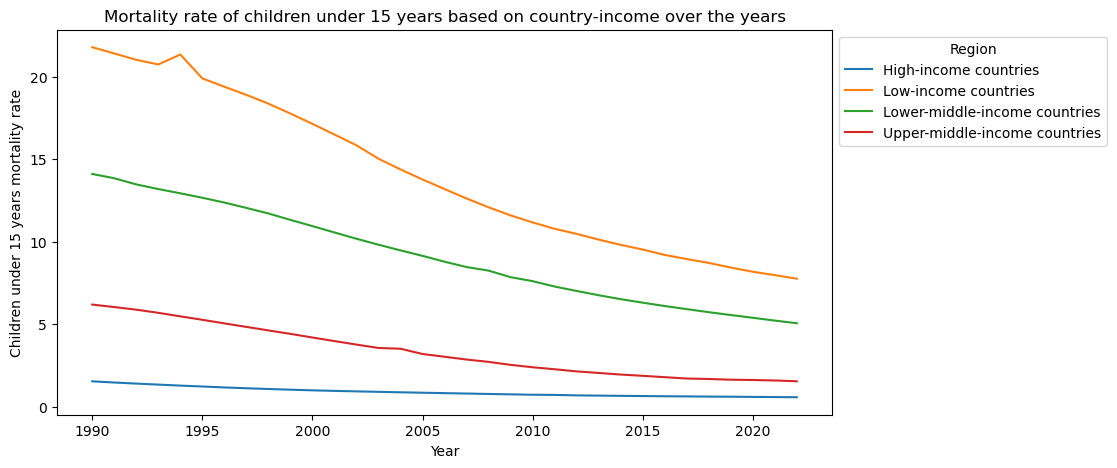

In [281]:
#Under 15 year mortality in each region

# Grouping the regions by year to show total number of deaths in each region over the years
under15_MR_income_chart = under15_MR_income.groupby(['Entity', 'Year']).mean(numeric_only=True).reset_index()

# Line plot for death of children under 15 years across regions over the years
plt.figure(figsize=(10, 5))
[plt.plot(value['Year'], value['Under-fifteen mortality rate'], label=region) for region, value in under15_MR_income_chart.groupby('Entity')]

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Children under 15 years mortality rate')
plt.title('Mortality rate of children under 15 years based on country-income over the years')
plt.legend(title="Region", bbox_to_anchor=(1.00, 1), loc='upper left')
plt.show()

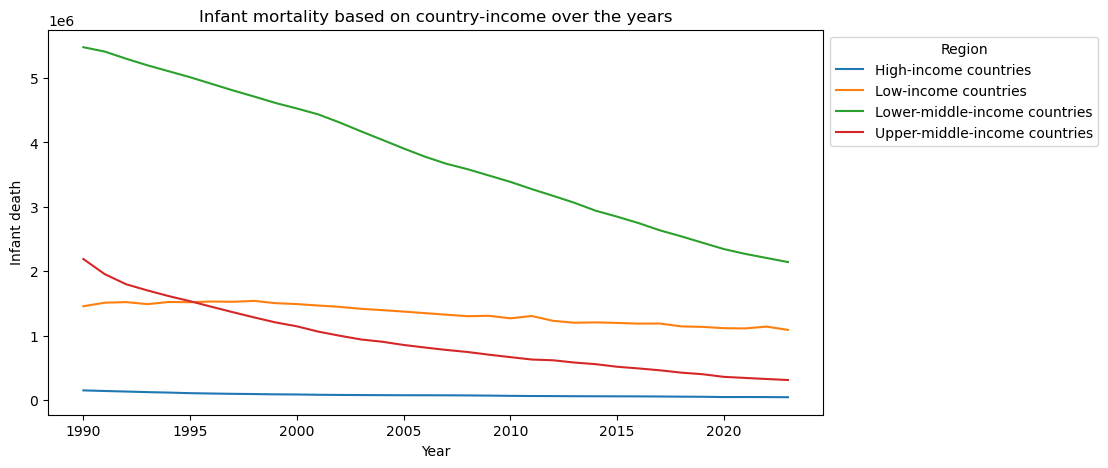

In [284]:
#Under 15 year mortality in each region
IMR_income_ = IMR_income[IMR_income.Year.between(1990,2024)]

# Grouping the regions by year to show total number of deaths in each region over the years
IMR_income_chart = IMR_income_.groupby(['Entity', 'Year']).mean(numeric_only=True).reset_index()

# Line plot for death of children under 15 years across regions over the years
plt.figure(figsize=(10, 5))
[plt.plot(value['Year'], value['Deaths - Sex: all - Age: 0 - Variant: estimates'], label=region) for region, value in IMR_income_chart.groupby('Entity')]

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Infant death')
plt.title('Infant mortality based on country-income over the years')
plt.legend(title="Region", bbox_to_anchor=(1.00, 1), loc='upper left')
plt.show()

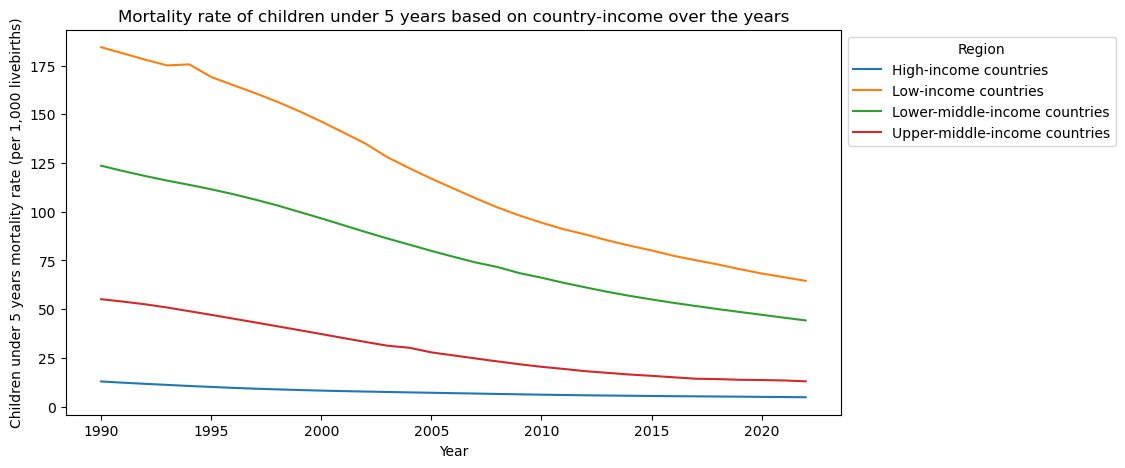

In [286]:
#Under 5 year mortality in each region

# Grouping the regions by year to show total number of deaths in each region over the years
child_MR_income_chart = child_MR_income.groupby(['Entity', 'Year']).mean(numeric_only=True).reset_index()

# Line plot for death of children under 15 years across regions over the years
plt.figure(figsize=(10, 5))
[plt.plot(value['Year'], value['Mortality_rate_per_1000'], label=region) for region, value in child_MR_income_chart.groupby('Entity')]

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Children under 5 years mortality rate (per 1,000 livebirths)')
plt.title('Mortality rate of children under 5 years based on country-income over the years')
plt.legend(title="Region", bbox_to_anchor=(1.00, 1), loc='upper left')
plt.show()

**INSIGHTS**

The effect of income status of the country on the child and mortality rates was also determined. Evidently, Low-income countries and Lower-middle-income countries, which often include majority of countries in Africa, had the highest infant deaths, and also childten mortality rate (both for children under 5 and 15 years).

High-income countries had the lowest rates amongst all age-grouped children.

## Causes of child and infant mortality in Africa

In [291]:
causes_AFR.age_group.unique()

array(['0-27 days', '1-59 months', '0-4 years'], dtype=object)

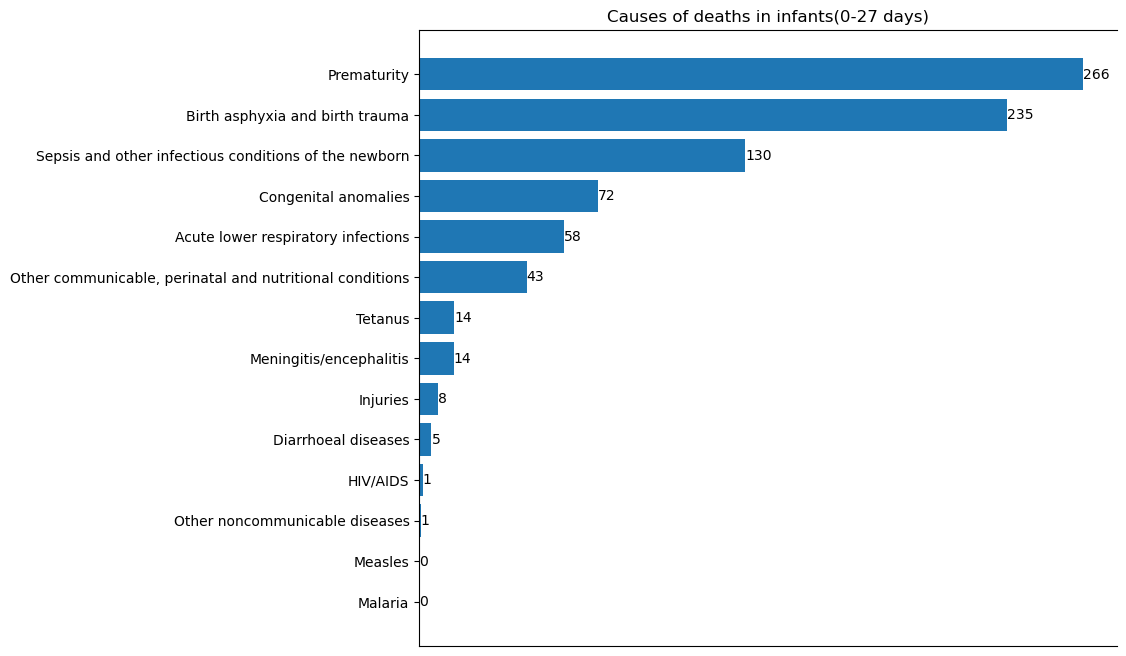

In [293]:
causes_AFR[causes_AFR.age_group == '0-27 days']

# Filtering causes of death in age group 0-27 days
infant_causes = causes_AFR[(causes_AFR.age_group == '0-27 days')]

#to determine causes of mortality in infants
causes_infant_death =infant_causes.groupby('cause_of_death')['value_numeric'].sum().sort_values(ascending = True)

fig,ax = plt.subplots(figsize =(9,8))
bars = ax.barh(causes_infant_death.index, causes_infant_death)
ax.bar_label(bars, labels=[f'{value:,.0f}' for value in causes_infant_death]) #Formatting to show the data labels in the bars
ax.set_xticks(ticks=[])
ax.set_title('Causes of deaths in infants(0-27 days)')
ax.spines['right'].set_visible(False)
plt.show()

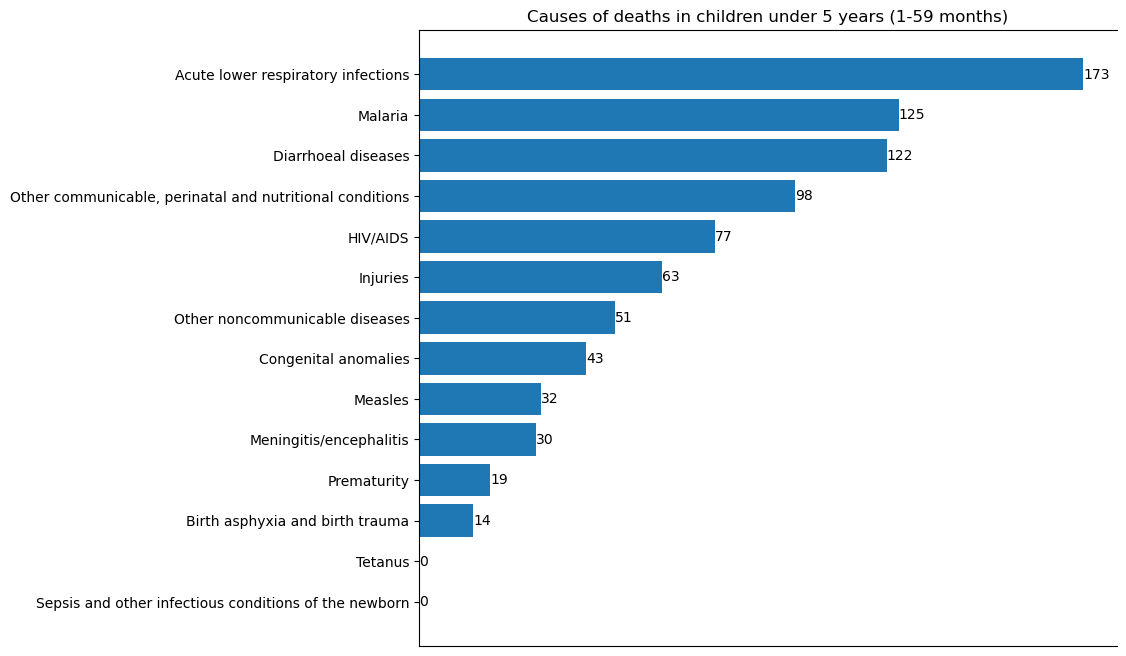

In [294]:
causes_AFR[causes_AFR.age_group == '1-59 months']

# Filtering causes of death in age group 0-27 days
child_causes = causes_AFR[(causes_AFR.age_group == '1-59 months')]

#to determine causes of mortality in infants
causes_child_death = child_causes.groupby('cause_of_death')['value_numeric'].sum().sort_values(ascending = True)

fig,ax = plt.subplots(figsize =(9,8))
bars = ax.barh(causes_child_death.index, causes_child_death)
ax.bar_label(bars, labels=[f'{value:,.0f}' for value in causes_child_death]) #Formatting to show the data labels in the bars
ax.set_xticks(ticks=[])
ax.set_title('Causes of deaths in children under 5 years (1-59 months)')
ax.spines['right'].set_visible(False)
plt.show()

**INSIGHT**

In the infant category (0-27 days), the main causes of death were prematurity, birth asphyxia and trauma, and sepsis and other infectious conditions of the new born.

For children under 5 years (1-59 months), the main causes of death were acute lower respiratory infections, malaria and diarrhoeal diseases.

## Summary & Recommendation


For summary & recommendation, kindly refer to published report:

**https://github.com/Orinamhe/2024-Hackathon---Tackling-Infant-Child-Mortality-in-Africa/blob/main/Orinamhe%20Godwin%20Agbadua_2024%20Hackathon%20report.pdf**